<a href="https://colab.research.google.com/github/Sajanm2058/Acoustic-Signal-Based-Binary-Classification-for-Brick-Wall-Inspection-by-Hammering-Test/blob/main/Validation_dual_input_CNN_Spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Validation of model (CNN-dual-input-spectrogram)

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

# Define the correct base input and output paths
base_input_dir = "/content/drive/MyDrive/Validation_data/segmented_audio"
base_output_dir = "/content/drive/MyDrive/Validation_data/spectrograms"

labels = ["impact", "vibration"]  # use lowercase as per your actual folder names

# Spectrogram creation function
def create_spectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(3, 3), dpi=128)
    librosa.display.specshow(S_dB, sr=sr, cmap='magma')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Loop through each class folder
for label in labels:
    input_dir = os.path.join(base_input_dir, label)
    output_dir = os.path.join(base_output_dir, label)
    os.makedirs(output_dir, exist_ok=True)

    for file in tqdm(os.listdir(input_dir), desc=f"Processing {label}"):
        if file.endswith(".wav"):
            input_path = os.path.join(input_dir, file)
            output_path = os.path.join(output_dir, file.replace(".wav", ".png"))
            create_spectrogram(input_path, output_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing impact:   0%|          | 0/286 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=882
  warnings.warn(
Processing vibration: 100%|██████████| 286/286 [00:20<00:00, 13.83it/s]


In [ ]:
import os, re, numpy as np, tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# 1️⃣  Load your trained model
model = load_model("dual_input_brick_classifier.h5")

# 2️⃣  Paths to the spectrogram folders in Drive
impact_dir    = "/content/drive/MyDrive/Validation_data/spectrograms/impact"
vibration_dir = "/content/drive/MyDrive/Validation_data/spectrograms/vibration"

IMG_SIZE = (128, 128)          # must match model’s expected size
label_map = {0: "Good", 1: "Bad"}

# ↪️ helper: read + scale an image
def load_and_preprocess(path):
    img = load_img(path, target_size=IMG_SIZE)
    return img_to_array(img) / 255.0

# ↪️ helper: turn filename into “pair key”  → sam1_imp1.png → sam1_1
def pair_key(fname: str) -> str:
    base = os.path.splitext(fname.lower())[0]               # sam1_imp1
    base = re.sub(r'_(imp|vib)', '_', base)                 # sam1_1
    return base

# 3️⃣  Index all impact & vibration files by their pair key
impact_dict    = {}
vibration_dict = {}

for f in os.listdir(impact_dir):
    if f.endswith(".png"):
        impact_dict[pair_key(f)] = f

for f in os.listdir(vibration_dir):
    if f.endswith(".png"):
        vibration_dict[pair_key(f)] = f

matched_keys = sorted(set(impact_dict) & set(vibration_dict))
print(f"✅ Found {len(matched_keys)} matching pairs.")

if not matched_keys:
    raise ValueError("No matching pairs found — check the filename pattern.")

# 4️⃣  Load, pair, and predict
impact_imgs, vibration_imgs, names = [], [], []

for key in tqdm(matched_keys, desc="Preparing image pairs"):
    imp_path = os.path.join(impact_dir,    impact_dict[key])
    vib_path = os.path.join(vibration_dir, vibration_dict[key])

    impact_imgs.append(load_and_preprocess(imp_path))
    vibration_imgs.append(load_and_preprocess(vib_path))
    names.append(key)                          # use key or original filename

impact_imgs    = np.array(impact_imgs)
vibration_imgs = np.array(vibration_imgs)

preds = model.predict([impact_imgs, vibration_imgs]).flatten()
labels = (preds > 0.5).astype(int)

# 5️⃣  Show results
print("\n--- Prediction Results ---")
for fname, lab in zip(names, labels):
    print(f"{fname}: {label_map[lab]}")


✅ Found 286 matching pairs.


Preparing image pairs: 100%|██████████| 286/286 [00:03<00:00, 84.41it/s]


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step

--- Prediction Results ---
sam10_1: Good
sam10_2: Good
sam10_3: Bad
sam10_4: Good
sam10_5: Good
sam11_1: Good
sam11_2: Bad
sam11_3: Good
sam11_4: Good
sam11_5: Good
sam12_1: Good
sam12_2: Good
sam12_3: Good
sam12_4: Good
sam12_5: Good
sam12_6: Good
sam13_1: Good
sam13_2: Good
sam13_3: Good
sam13_4: Good
sam13_5: Good
sam14_1: Good
sam14_2: Good
sam14_3: Good
sam14_4: Good
sam14_5: Good
sam15_1: Good
sam15_2: Good
sam15_3: Good
sam15_4: Good
sam15_5: Good
sam16_1: Good
sam16_2: Good
sam16_3: Good
sam16_4: Good
sam16_5: Good
sam17_1: Good
sam17_2: Good
sam17_3: Good
sam17_4: Good
sam17_5: Good
sam18_1: Good
sam18_2: Good
sam18_3: Good
sam18_4: Good
sam18_5: Good
sam19_1: Good
sam19_2: Good
sam19_3: Good
sam19_4: Good
sam19_5: Good
sam1_1: Good
sam1_2: Good
sam1_3: Good
sam1_4: Good
sam1_5: Good
sam1_6: Good
sam20_1: Good
sam20_2: Good
sam20_3: Good
sam20_4: Good
sam20_5: Good
sam21_1: Good
sam21_2: Good
sam21_3: Good
sam21_4: Good
sam21_5: Good
sam2

pair_key() removes the _imp or _vib tag (case‑insensitive) so sam1_imp1.png and sam1_vib1.png collapse to the same key, sam1_1.

We build two dictionaries (impact_dict, vibration_dict) keyed by that value, then take the intersection to get true pairs.

Everything else (pre‑processing, prediction, printing) is identical.


In [ ]:
import csv

# After your prediction block:

# Prepare CSV output path
output_csv = "/content/drive/MyDrive/Validation_data/predictions.csv"

with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(["Filename", "Predicted Label", "Confidence"])

    # Write rows
    for fname, prob in zip(names, preds):
        lab = 1 if prob > 0.5 else 0
        writer.writerow([fname, label_map[lab], f"{prob:.4f}"])

print(f"✅ Predictions saved to {output_csv}")


✅ Predictions saved to /content/drive/MyDrive/Validation_data/predictions.csv


In [ ]:
import os, re, numpy as np, tensorflow as tf, csv
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# 1️⃣ Load your trained model
model = load_model("dual_input_brick_classifier.h5")

# 2️⃣ Paths to the spectrogram folders in Drive
impact_dir    = "/content/drive/MyDrive/Validation_data/spectrograms/impact"
vibration_dir = "/content/drive/MyDrive/Validation_data/spectrograms/vibration"

IMG_SIZE = (128, 128)  # must match model’s expected size
label_map = {1: "Good", 0: "Bad"}

# Helper: read + scale an image
def load_and_preprocess(path):
    img = load_img(path, target_size=IMG_SIZE)
    return img_to_array(img) / 255.0

# Helper: turn filename into “pair key” → sam1_imp1.png → sam1_1
def pair_key(fname: str) -> str:
    base = os.path.splitext(fname.lower())[0]  # sam1_imp1
    base = re.sub(r'_(imp|vib)', '_', base)    # sam1_1
    return base

# 3️⃣ Index all impact & vibration files by their pair key
impact_dict, vibration_dict = {}, {}

for f in os.listdir(impact_dir):
    if f.endswith(".png"):
        impact_dict[pair_key(f)] = f

for f in os.listdir(vibration_dir):
    if f.endswith(".png"):
        vibration_dict[pair_key(f)] = f

matched_keys = sorted(set(impact_dict) & set(vibration_dict))
print(f"✅ Found {len(matched_keys)} matching pairs.")

if not matched_keys:
    raise ValueError("No matching pairs found — check the filename pattern.")

# 4️⃣ Load, pair, and predict
impact_imgs, vibration_imgs, names = [], [], []

for key in tqdm(matched_keys, desc="Preparing image pairs"):
    imp_path = os.path.join(impact_dir, impact_dict[key])
    vib_path = os.path.join(vibration_dir, vibration_dict[key])

    impact_imgs.append(load_and_preprocess(imp_path))
    vibration_imgs.append(load_and_preprocess(vib_path))
    names.append(key)

impact_imgs = np.array(impact_imgs)
vibration_imgs = np.array(vibration_imgs)

preds = model.predict([impact_imgs, vibration_imgs]).flatten()

# 5️⃣ Show results and save to CSV
output_csv = "/content/drive/MyDrive/Validation_data/predictions.csv"

with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Filename", "Predicted Label", "Confidence"])

    print("\n--- Prediction Results ---")
    for fname, prob in zip(names, preds):
        lab = 1 if prob > 0.5 else 0
        print(f"{fname}: {label_map[lab]} (confidence: {prob:.4f})")
        writer.writerow([fname, label_map[lab], f"{prob:.4f}"])

print(f"\n✅ Predictions saved to {output_csv}")


✅ Found 286 matching pairs.


Preparing image pairs: 100%|██████████| 286/286 [00:03<00:00, 87.71it/s]


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step

--- Prediction Results ---
sam10_1: Bad (confidence: 0.0391)
sam10_2: Bad (confidence: 0.1324)
sam10_3: Good (confidence: 0.5784)
sam10_4: Bad (confidence: 0.1789)
sam10_5: Bad (confidence: 0.1300)
sam11_1: Bad (confidence: 0.3492)
sam11_2: Good (confidence: 0.6427)
sam11_3: Bad (confidence: 0.4930)
sam11_4: Bad (confidence: 0.3539)
sam11_5: Bad (confidence: 0.4173)
sam12_1: Bad (confidence: 0.0443)
sam12_2: Bad (confidence: 0.0652)
sam12_3: Bad (confidence: 0.1721)
sam12_4: Bad (confidence: 0.1114)
sam12_5: Bad (confidence: 0.0818)
sam12_6: Bad (confidence: 0.0000)
sam13_1: Bad (confidence: 0.0301)
sam13_2: Bad (confidence: 0.0151)
sam13_3: Bad (confidence: 0.0356)
sam13_4: Bad (confidence: 0.0920)
sam13_5: Bad (confidence: 0.0240)
sam14_1: Bad (confidence: 0.0583)
sam14_2: Bad (confidence: 0.0210)
sam14_3: Bad (confidence: 0.1236)
sam14_4: Bad (confidence: 0.0269)
sam14_5: Bad (confidence: 0.0639)
sam15_1: Bad (confidence: 0.1930)
sam15_2: Bad (

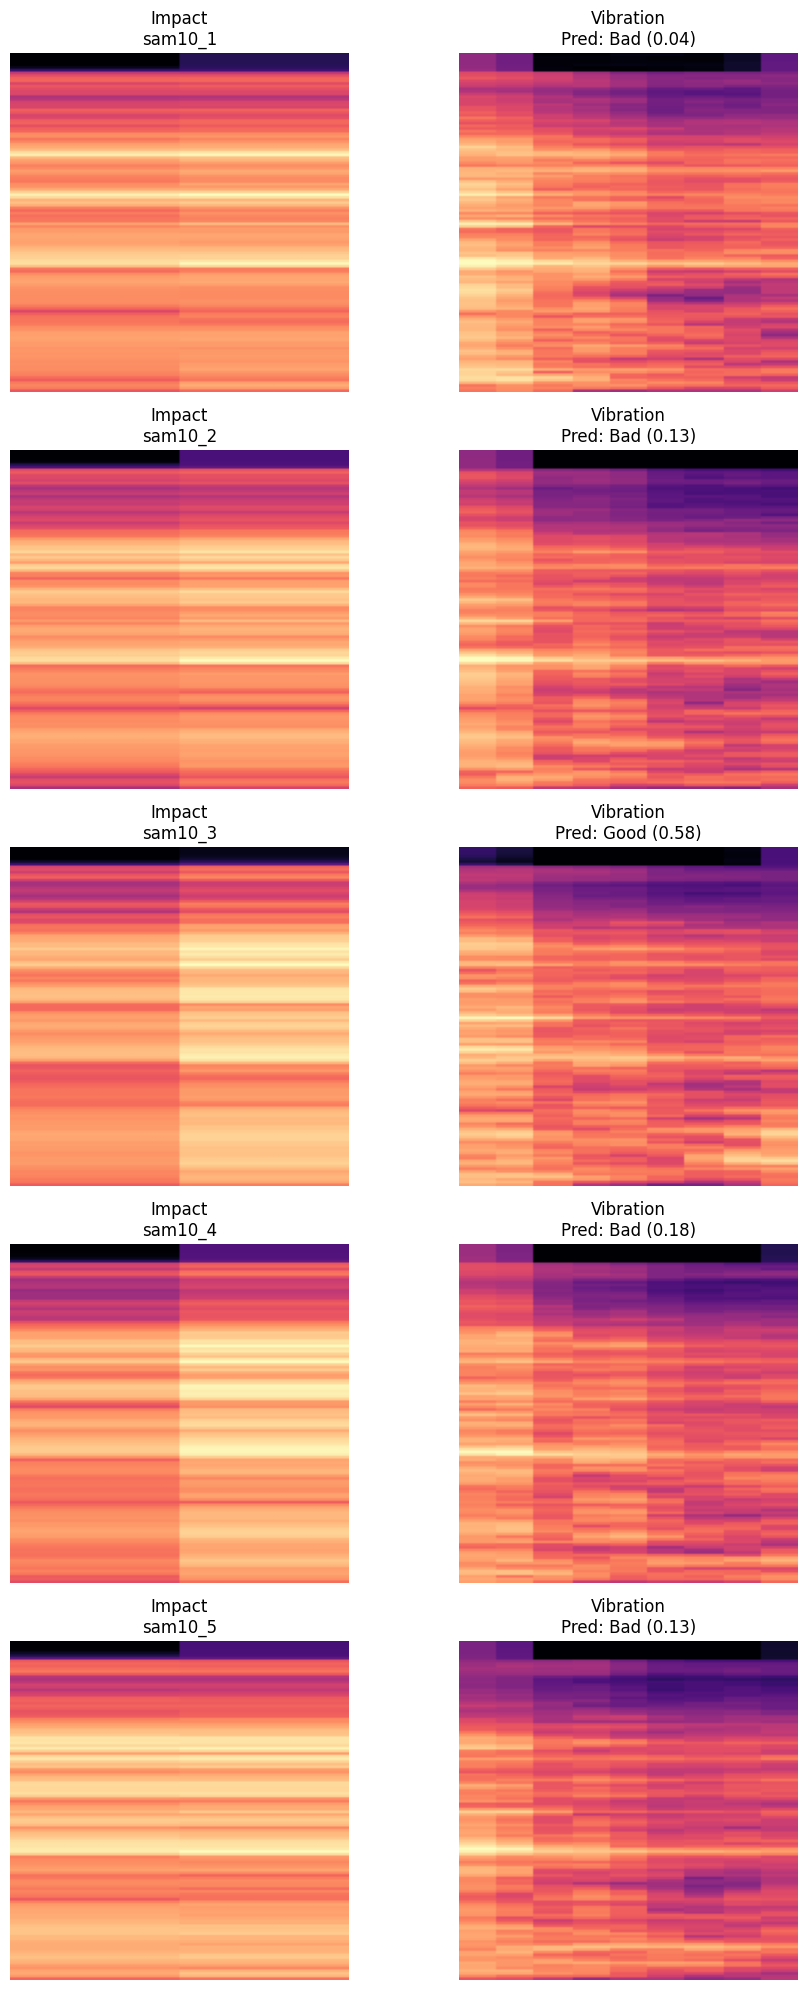

In [ ]:
import matplotlib.pyplot as plt

num_to_show = 5  # how many pairs to visualize

plt.figure(figsize=(10, num_to_show * 4))

for i in range(num_to_show):
    # Impact image (left)
    plt.subplot(num_to_show, 2, 2*i + 1)
    plt.imshow(impact_imgs[i])
    plt.title(f"Impact\n{names[i]}")
    plt.axis('off')

    # Vibration image (right)
    plt.subplot(num_to_show, 2, 2*i + 2)
    plt.imshow(vibration_imgs[i])
    lab = 1 if preds[i] > 0.5 else 0
    plt.title(f"Vibration\nPred: {label_map[lab]} ({preds[i]:.2f})")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os, re, csv, numpy as np, tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# 1️⃣ Load your trained model
model = load_model("dual_input_brick_classifier.h5")

# 2️⃣ Paths to the spectrogram folders in Drive
impact_dir    = "/content/drive/MyDrive/Hammering_Test/spectrograms/impact"
vibration_dir = "/content/drive/MyDrive/Hammering_Test/spectrograms/vibration"

IMG_SIZE   = (128, 128)        # must match model’s expected size
LABEL_MAP  = {1: "Good", 0: "Bad"}

# Helper ➜ read & scale an image
def load_and_preprocess(path):
    img = load_img(path, target_size=IMG_SIZE)
    return img_to_array(img) / 255.0

# Helper ➜ build a pairing key
#   "sample_1_hit_0.png" ─▶ "sample_1_0"
#   "sample_1_vib_0.png" ─▶ "sample_1_0"
def pair_key(fname: str) -> str:
    base = os.path.splitext(fname.lower())[0]            # sample_1_hit_0
    base = re.sub(r'_(hit|vib)', '_', base)              # sample_1__0  → sample_1_0
    base = re.sub(r'__', '_', base)                      # remove double underscore if created
    return base

# 3️⃣ Index all impact & vibration files by their pair key
impact_dict    = {pair_key(f): f for f in os.listdir(impact_dir)    if f.endswith(".png")}
vibration_dict = {pair_key(f): f for f in os.listdir(vibration_dir) if f.endswith(".png")}

matched_keys = sorted(set(impact_dict) & set(vibration_dict))
print(f"✅ Found {len(matched_keys)} matching pairs.")

if not matched_keys:
    raise ValueError("No matching pairs found — check the filename pattern.")

# 4️⃣ Load, pair, and predict
impact_imgs, vibration_imgs, names = [], [], []
for key in tqdm(matched_keys, desc="Preparing image pairs"):
    impact_imgs.append(load_and_preprocess(os.path.join(impact_dir,    impact_dict[key])))
    vibration_imgs.append(load_and_preprocess(os.path.join(vibration_dir, vibration_dict[key])))
    names.append(key)

impact_imgs    = np.array(impact_imgs,    dtype=np.float32)
vibration_imgs = np.array(vibration_imgs, dtype=np.float32)

print("🔮 Running inference …")
preds = model.predict([impact_imgs, vibration_imgs]).flatten()

# 5️⃣ Show results and save to CSV
output_csv = "/content/drive/MyDrive/Hammering_Test/predictions.csv"
with open(output_csv, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Filename", "Predicted Label", "Confidence"])

    print("\n--- Prediction Results ---")
    for fname, prob in zip(names, preds):
        lab = 0 if prob > 0.5 else 1
        print(f"{fname}: {LABEL_MAP[lab]} (confidence: {prob:.4f})")
        writer.writerow([fname, LABEL_MAP[lab], f"{prob:.4f}"])

print(f"\n✅ Predictions saved to {output_csv}")


✅ Found 20 matching pairs.


Preparing image pairs: 100%|██████████| 20/20 [00:00<00:00, 126.31it/s]


🔮 Running inference …
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step

--- Prediction Results ---
sample_1_0: Good (confidence: 0.0000)
sample_1_1: Good (confidence: 0.0070)
sample_1_2: Good (confidence: 0.0000)
sample_1_3: Good (confidence: 0.2173)
sample_1_4: Good (confidence: 0.0000)
sample_2_0: Good (confidence: 0.1295)
sample_2_1: Bad (confidence: 0.7009)
sample_2_2: Bad (confidence: 0.9666)
sample_2_3: Good (confidence: 0.3869)
sample_2_4: Good (confidence: 0.0066)
sample_3_0: Bad (confidence: 0.9823)
sample_3_1: Bad (confidence: 0.9410)
sample_3_2: Bad (confidence: 0.9930)
sample_3_3: Good (confidence: 0.3006)
sample_3_4: Bad (confidence: 0.9598)
sample_4_0: Bad (confidence: 0.5846)
sample_4_1: Bad (confidence: 0.9997)
sample_4_2: Bad (confidence: 0.5093)
sample_4_3: Bad (confidence: 0.5325)
sample_4_4: Bad (confidence: 0.9999)

✅ Predictions saved to /content/drive/MyDrive/Hammering_Test/predictions.csv


#New validation data balambu


In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

# Define the correct base input and output paths
base_input_dir = "/content/drive/MyDrive/Hammering_Test/New_val_G/segmented_audio"
base_output_dir = "/content/drive/MyDrive/Hammering_Test/New_val_G/spectrograms"

labels = ["impact", "vibration"]  # use lowercase as per your actual folder names

# Spectrogram creation function
def create_spectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(3, 3), dpi=128)
    librosa.display.specshow(S_dB, sr=sr, cmap='magma')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Loop through each class folder
for label in labels:
    input_dir = os.path.join(base_input_dir, label)
    output_dir = os.path.join(base_output_dir, label)
    os.makedirs(output_dir, exist_ok=True)

    for file in tqdm(os.listdir(input_dir), desc=f"Processing {label}"):
        if file.endswith(".wav"):
            input_path = os.path.join(input_dir, file)
            output_path = os.path.join(output_dir, file.replace(".wav", ".png"))
            create_spectrogram(input_path, output_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing vibration: 100%|██████████| 333/333 [00:32<00:00, 10.30it/s]


In [ ]:
import os, re, numpy as np, tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# 1️⃣  Load your trained model
model = load_model("/content/drive/MyDrive/Hammering_Test/dual_input_brick_classifier.h5")

# 2️⃣  Paths to the spectrogram folders in Drive
impact_dir    = "/content/drive/MyDrive/Hammering_Test/New_val_G/spectrograms/impact"
vibration_dir = "/content/drive/MyDrive/Hammering_Test/New_val_G/spectrograms/vibration"

IMG_SIZE = (128, 128)          # must match model’s expected size
label_map = {0: "Good", 1: "Bad"}

# ↪️ helper: read + scale an image
def load_and_preprocess(path):
    img = load_img(path, target_size=IMG_SIZE)
    return img_to_array(img) / 255.0

# ↪️ helper: turn filename into “pair key”  → sam1_imp1.png → sam1_1
def pair_key(fname: str) -> str:
    base = os.path.splitext(fname.lower())[0]               # sam1_imp1
    base = re.sub(r'_(imp|vib)', '_', base)                 # sam1_1
    return base

# 3️⃣  Index all impact & vibration files by their pair key
impact_dict    = {}
vibration_dict = {}

for f in os.listdir(impact_dir):
    if f.endswith(".png"):
        impact_dict[pair_key(f)] = f

for f in os.listdir(vibration_dir):
    if f.endswith(".png"):
        vibration_dict[pair_key(f)] = f

matched_keys = sorted(set(impact_dict) & set(vibration_dict))
print(f"✅ Found {len(matched_keys)} matching pairs.")

if not matched_keys:
    raise ValueError("No matching pairs found — check the filename pattern.")

# 4️⃣  Load, pair, and predict
impact_imgs, vibration_imgs, names = [], [], []

for key in tqdm(matched_keys, desc="Preparing image pairs"):
    imp_path = os.path.join(impact_dir,    impact_dict[key])
    vib_path = os.path.join(vibration_dir, vibration_dict[key])

    impact_imgs.append(load_and_preprocess(imp_path))
    vibration_imgs.append(load_and_preprocess(vib_path))
    names.append(key)                          # use key or original filename

impact_imgs    = np.array(impact_imgs)
vibration_imgs = np.array(vibration_imgs)

preds = model.predict([impact_imgs, vibration_imgs]).flatten()
labels = (preds > 0.5).astype(int)

# 5️⃣  Show results
print("\n--- Prediction Results ---")
for fname, lab in zip(names, labels):
    print(f"{fname}: {label_map[lab]}")


✅ Found 333 matching pairs.


Preparing image pairs: 100%|██████████| 333/333 [00:06<00:00, 54.60it/s]


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 438ms/step

--- Prediction Results ---
sam10_1: Good
sam10_2: Good
sam10_3: Good
sam10_4: Good
sam10_5: Good
sam10_6: Bad
sam10_7: Good
sam11_1: Good
sam11_2: Good
sam11_3: Good
sam11_4: Good
sam11_5: Good
sam12_1: Good
sam12_2: Good
sam12_3: Good
sam12_4: Good
sam12_5: Good
sam13_1: Good
sam13_2: Good
sam13_3: Good
sam13_4: Good
sam13_5: Good
sam14_1: Good
sam14_2: Good
sam14_3: Good
sam14_4: Good
sam14_5: Good
sam14_6: Good
sam15_1: Good
sam15_2: Good
sam15_3: Good
sam15_4: Good
sam15_5: Good
sam15_6: Good
sam16_1: Good
sam16_2: Good
sam16_3: Good
sam16_4: Good
sam16_5: Good
sam17_1: Good
sam17_2: Good
sam17_3: Good
sam17_4: Good
sam17_5: Bad
sam17_6: Good
sam18_1: Good
sam18_2: Good
sam18_3: Good
sam18_4: Good
sam18_5: Bad
sam18_6: Good
sam19_1: Good
sam19_2: Good
sam19_3: Good
sam19_4: Good
sam19_5: Good
sam19_6: Good
sam19_7: Good
sam19_8: Good
sam1_1: Good
sam1_2: Good
sam1_3: Good
sam1_4: Good
sam1_5: Good
sam1_6: Good
sam20_1: Good
sam20_2: Good
sa

✅ Found 333 matching pairs.


Preparing image pairs: 100%|██████████| 333/333 [00:05<00:00, 64.81it/s]


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 453ms/step
📁 Results saved to /content/drive/MyDrive/Hammering_Test/New_val_G/predictions.csv

--- Prediction Results ---
sam10_1: Good (conf: 0.0201)
sam10_2: Good (conf: 0.0188)
sam10_3: Good (conf: 0.0032)
sam10_4: Good (conf: 0.0040)
sam10_5: Good (conf: 0.0459)
sam10_6: Bad (conf: 0.7022)
sam10_7: Good (conf: 0.0000)
sam11_1: Good (conf: 0.0111)
sam11_2: Good (conf: 0.0926)
sam11_3: Good (conf: 0.3735)
sam11_4: Good (conf: 0.0011)
sam11_5: Good (conf: 0.0055)
sam12_1: Good (conf: 0.0004)
sam12_2: Good (conf: 0.0080)
sam12_3: Good (conf: 0.0001)
sam12_4: Good (conf: 0.0017)
sam12_5: Good (conf: 0.0014)
sam13_1: Good (conf: 0.0045)
sam13_2: Good (conf: 0.0003)
sam13_3: Good (conf: 0.0009)
sam13_4: Good (conf: 0.0031)
sam13_5: Good (conf: 0.0022)
sam14_1: Good (conf: 0.0081)
sam14_2: Good (conf: 0.0015)
sam14_3: Good (conf: 0.0003)
sam14_4: Good (conf: 0.0024)
sam14_5: Good (conf: 0.0097)
sam14_6: Good (conf: 0.0150)
sam15_1: Good (conf: 0.0006)
sam15_2:

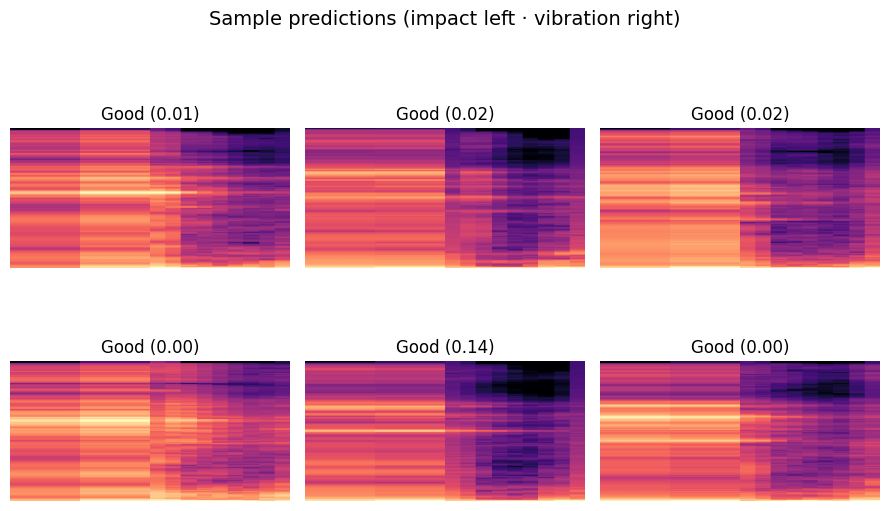

In [ ]:
import os, re, csv, random, numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# 1️⃣  Load your trained model
model = load_model("/content/drive/MyDrive/Hammering_Test/dual_input_brick_classifier.h5")

# 2️⃣  Paths to the spectrogram folders in Drive
impact_dir    = "/content/drive/MyDrive/Hammering_Test/New_val_G/spectrograms/impact"
vibration_dir = "/content/drive/MyDrive/Hammering_Test/New_val_G/spectrograms/vibration"

IMG_SIZE   = (128, 128)          # must match model’s expected size
label_map  = {0: "Good", 1: "Bad"}
csv_path   = "/content/drive/MyDrive/Hammering_Test/New_val_G/predictions.csv"

# ↪️ helper: read + scale an image
def load_and_preprocess(path):
    img = load_img(path, target_size=IMG_SIZE)
    return img_to_array(img) / 255.0

# ↪️ helper: turn filename into “pair key”  → sam1_imp1.png → sam1_1
def pair_key(fname: str) -> str:
    base = os.path.splitext(fname.lower())[0]               # sam1_imp1
    base = re.sub(r'_(imp|vib)', '_', base)                 # sam1_1
    return base

# 3️⃣  Index all impact & vibration files by their pair key
impact_dict, vibration_dict = {}, {}
for f in os.listdir(impact_dir):
    if f.endswith(".png"): impact_dict[pair_key(f)] = f
for f in os.listdir(vibration_dir):
    if f.endswith(".png"): vibration_dict[pair_key(f)] = f

matched_keys = sorted(set(impact_dict) & set(vibration_dict))
print(f"✅ Found {len(matched_keys)} matching pairs.")
if not matched_keys:
    raise ValueError("No matching pairs found — check the filename pattern.")

# 4️⃣  Load, pair, and predict
impact_imgs, vibration_imgs, names = [], [], []
for key in tqdm(matched_keys, desc="Preparing image pairs"):
    impact_imgs.append(load_and_preprocess(os.path.join(impact_dir,    impact_dict[key])))
    vibration_imgs.append(load_and_preprocess(os.path.join(vibration_dir, vibration_dict[key])))
    names.append(key)                 # use key or original filename

impact_imgs, vibration_imgs = map(np.array, (impact_imgs, vibration_imgs))

preds   = model.predict([impact_imgs, vibration_imgs]).flatten()
labels  = (preds > 0.5).astype(int)

# 5️⃣ Save to CSV (pred_class: "Good" or "Bad")
with open(csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["pair_key", "pred_class", "confidence"])  # <-- updated column names
    for fname, lab, prob in zip(names, labels, preds):
        writer.writerow([fname, label_map[lab], f"{prob:.4f}"])  # <-- convert label to "Good"/"Bad"
print(f"📁 Results saved to {csv_path}")


# 6️⃣  Console summary
print("\n--- Prediction Results ---")
for fname, lab, prob in zip(names, labels, preds):
    print(f"{fname}: {label_map[lab]} (conf: {prob:.4f})")

# 7️⃣  Visualise a few random examples (3×2 grid)
n_show = min(6, len(names))               # don’t exceed dataset size
idxs   = random.sample(range(len(names)), n_show)
plt.figure(figsize=(9, 6))
for i, idx in enumerate(idxs, 1):
    plt.subplot(2, 3, i)
    # stack the impact + vibration images side‑by‑side for quick inspection
    combo = np.hstack([
        impact_imgs[idx],
        vibration_imgs[idx]
    ])
    plt.imshow(combo)
    title = f"{label_map[labels[idx]]} ({preds[idx]:.2f})"
    plt.title(title)
    plt.axis("off")
plt.suptitle("Sample predictions (impact left · vibration right)", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Hammering_Test/New_val_G/predictions.csv")

In [ ]:
df

,pair_key,pred_class,confidence
0,sam10_1,Good,0.0201
1,sam10_2,Good,0.0188
2,sam10_3,Good,0.0032
3,sam10_4,Good,0.0040
4,sam10_5,Good,0.0459
...,...,...,...
328,sam9_1,Good,0.0017
329,sam9_2,Good,0.0266
330,sam9_3,Good,0.0062
331,sam9_4,Good,0.0000


In [ ]:
df['Ground_truth'] = 'Good'

In [ ]:
df

,pair_key,pred_class,confidence,Ground_truth
0,sam10_1,Good,0.0201,Good
1,sam10_2,Good,0.0188,Good
2,sam10_3,Good,0.0032,Good
3,sam10_4,Good,0.0040,Good
4,sam10_5,Good,0.0459,Good
...,...,...,...,...
328,sam9_1,Good,0.0017,Good
329,sam9_2,Good,0.0266,Good
330,sam9_3,Good,0.0062,Good
331,sam9_4,Good,0.0000,Good


In [ ]:
df.drop(['pred_class','confidence'], axis=1, inplace=True)

In [ ]:
df.to_csv("/content/drive/MyDrive/Hammering_Test/New_val_G/GT.csv", index=False)

In [ ]:
df.to_csv("/content/drive/MyDrive/Hammering_Test/New_val_G/predictions_GT.csv", index=False)

In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# 🔄 1)  Paths to your CSVs
gt_path   = "/content/drive/MyDrive/Hammering_Test/New_val_G/GT.csv"
pred_path = "/content/drive/MyDrive/Hammering_Test/New_val_G/predictions.csv"

# 📖 2)  Read the files
gt_df   = pd.read_csv(gt_path)                        # pair_key, Ground_truth
pred_df = pd.read_csv(pred_path)                     # pair_key, pred_class, confidence

# 🧹 3)  Harmonise column names
gt_df   = gt_df.rename(columns={"Ground_truth": "true_class"})
pred_df = pred_df.rename(columns={"pred_class": "predicted_class"})

# 🔗 4)  Merge on pair_key (inner join keeps only matching rows)
df = pd.merge(gt_df, pred_df, on="pair_key", how="inner", validate="one_to_one")

if df.empty:
    raise ValueError("No matching pair_key values between the two CSV files!")

print(f"✅ Evaluating {len(df)} matching samples")

# 🔁 5)  Convert text labels to integers (Good = 0, Bad = 1)
label_map = {"Good": 0, "Bad": 1}
y_true = df["true_class"].map(label_map).values
y_pred = df["predicted_class"].map(label_map).values

# 📊 6)  Metrics
print("\n--- Validation Metrics ---")
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}\n")

print(classification_report(
    y_true,
    y_pred,
    target_names=["Good", "Bad"],
    digits=4
))

print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


✅ Evaluating 333 matching samples

--- Validation Metrics ---
Accuracy: 0.9099

              precision    recall  f1-score   support

        Good     1.0000    0.9099    0.9528       333
         Bad     0.0000    0.0000    0.0000         0

    accuracy                         0.9099       333
   macro avg     0.5000    0.4550    0.4764       333
weighted avg     1.0000    0.9099    0.9528       333

Confusion Matrix:
 [[303  30]
 [  0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Evaluating 333 matching samples

--- Classification Report ---
              precision    recall  f1-score   support

        Good     1.0000    0.9099    0.9528       333
         Bad     0.0000    0.0000    0.0000         0

    accuracy                         0.9099       333
   macro avg     0.5000    0.4550    0.4764       333
weighted avg     1.0000    0.9099    0.9528       333

✅ Accuracy: 0.9099


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


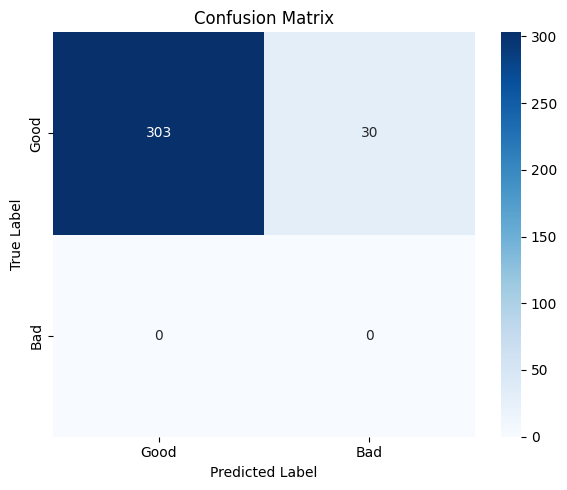

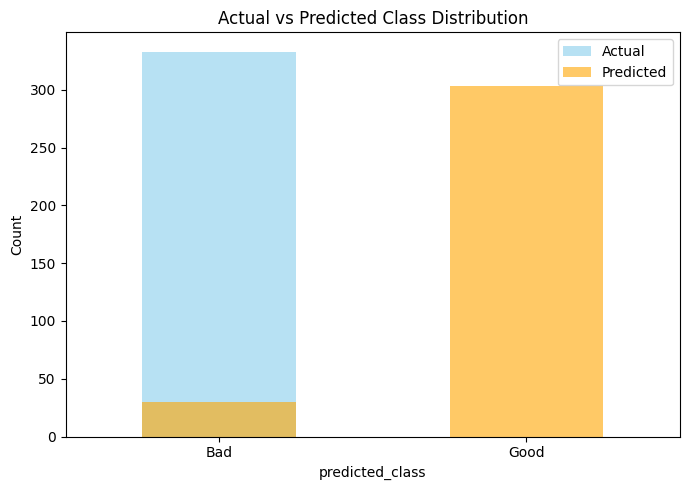

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# 🔄 1) CSV paths
gt_path   = "/content/drive/MyDrive/Hammering_Test/New_val_G/GT.csv"
pred_path = "/content/drive/MyDrive/Hammering_Test/New_val_G/predictions.csv"

# 📖 2) Read CSVs
gt_df   = pd.read_csv(gt_path)        # pair_key, Ground_truth
pred_df = pd.read_csv(pred_path)      # pair_key, pred_class, confidence

# 🧹 3) Rename columns to unify
gt_df   = gt_df.rename(columns={"Ground_truth": "true_class"})
pred_df = pred_df.rename(columns={"pred_class": "predicted_class"})

# 🔗 4) Merge on pair_key
df = pd.merge(gt_df, pred_df, on="pair_key", how="inner", validate="one_to_one")

if df.empty:
    raise ValueError("❌ No matching pair_key values between the two CSV files!")

print(f"✅ Evaluating {len(df)} matching samples")

# 🔁 5) Map class names to 0/1
label_map = {"Good": 0, "Bad": 1}
inv_label_map = {0: "Good", 1: "Bad"}

y_true = df["true_class"].map(label_map).values
y_pred = df["predicted_class"].map(label_map).values

# 📊 6) Metrics
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=["Good", "Bad"], digits=4))
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# 📉 7) Confusion Matrix Plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Good", "Bad"],
            yticklabels=["Good", "Bad"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 📊 8) Bar Plot: Actual vs Predicted counts
plt.figure(figsize=(7, 5))
df["true_class"].value_counts().sort_index().plot(kind="bar", alpha=0.6, label="Actual", color="skyblue")
df["predicted_class"].value_counts().sort_index().plot(kind="bar", alpha=0.6, label="Predicted", color="orange")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Actual vs Predicted Class Distribution")
plt.legend()
plt.tight_layout()
plt.show()


# Bac Data validation

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

# Define the correct base input and output paths
base_input_dir = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result"
base_output_dir = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/spectrograms"

labels = ["impact", "vibration"]  # use lowercase as per your actual folder names

# Spectrogram creation function
def create_spectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(3, 3), dpi=128)
    librosa.display.specshow(S_dB, sr=sr, cmap='viridis')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Loop through each class folder
for label in labels:
    input_dir = os.path.join(base_input_dir, label)
    output_dir = os.path.join(base_output_dir, label)
    os.makedirs(output_dir, exist_ok=True)

    for file in tqdm(os.listdir(input_dir), desc=f"Processing {label}"):
        if file.endswith(".wav"):
            input_path = os.path.join(input_dir, file)
            output_path = os.path.join(output_dir, file.replace(".wav", ".png"))
            create_spectrogram(input_path, output_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing impact:   0%|          | 0/57 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=882
  warnings.warn(
Processing impact:   5%|▌         | 3/57 [00:00<00:02, 21.30it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=882
  warnings.warn(
Processing impact:  33%|███▎      | 19/57 [00:01<00:02, 17.32it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=882
  warnings.warn(
Processing impact:  95%|█████████▍| 54/57 [00:03<00:00, 20.87it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=882
  warnings.warn(
Processing vibration:  70%|███████   | 40/57 [00:02<00:01, 11.24it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spec

✅ Found 57 matching pairs.


Preparing image pairs: 100%|██████████| 57/57 [00:26<00:00,  2.14it/s]


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 905ms/step
📁 Results saved to /content/drive/MyDrive/Hammering_Test/s01/Bad_result/predictions.csv

--- Prediction Results ---
sample_10_0: Bad (conf: 0.9998)
sample_10_1: Bad (conf: 0.9996)
sample_10_2: Bad (conf: 1.0000)
sample_10_3: Bad (conf: 1.0000)
sample_10_4: Bad (conf: 0.9085)
sample_1_0: Bad (conf: 0.9959)
sample_1_1: Bad (conf: 1.0000)
sample_1_2: Bad (conf: 1.0000)
sample_1_3: Bad (conf: 1.0000)
sample_1_4: Bad (conf: 0.9934)
sample_2_0: Bad (conf: 0.9898)
sample_2_1: Bad (conf: 0.9765)
sample_2_2: Bad (conf: 0.9913)
sample_2_3: Bad (conf: 0.9385)
sample_2_4: Bad (conf: 0.9969)
sample_3_0: Bad (conf: 0.9794)
sample_3_1: Bad (conf: 0.9364)
sample_3_2: Bad (conf: 0.9928)
sample_3_3: Good (conf: 0.3042)
sample_3_4: Bad (conf: 0.9582)
sample_4_0: Bad (conf: 0.5733)
sample_4_1: Bad (conf: 0.9997)
sample_4_2: Bad (conf: 0.5144)
sample_4_3: Bad (conf: 0.5282)
sample_4_4: Bad (conf: 0.9998)
sample_5_0: Bad (conf: 0.6557)
sample_5_1: Bad (conf: 0.9733)
sa

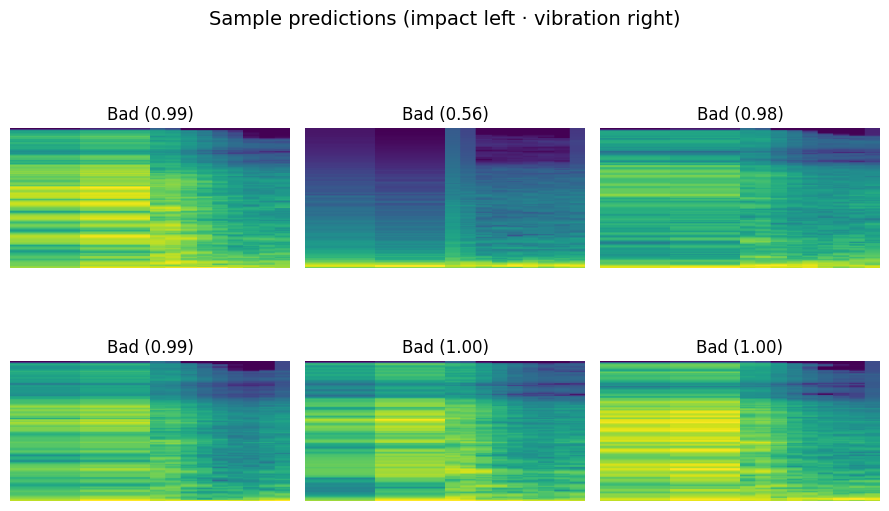

In [ ]:
import os, re, csv, random, numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# 1️⃣  Load your trained model
model = load_model("/content/drive/MyDrive/Hammering_Test/dual_input_brick_classifier.h5")

# 2️⃣  Paths to the spectrogram folders in Drive
impact_dir    = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/spectrograms/impact"
vibration_dir = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/spectrograms/vibration"

IMG_SIZE   = (128, 128)          # must match model’s expected size
label_map  = {0: "Good", 1: "Bad"}
csv_path   = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/predictions.csv"

# ↪️ helper: read + scale an image
def load_and_preprocess(path):
    img = load_img(path, target_size=IMG_SIZE)
    return img_to_array(img) / 255.0

# ↪️ helper: turn filename into “pair key”
#   "sample_1_hit_0.png" ─▶ "sample_1_0"
#   "sample_1_vib_0.png" ─▶ "sample_1_0"
def pair_key(fname: str) -> str:
    base = os.path.splitext(fname.lower())[0]            # sample_1_hit_0
    base = re.sub(r'_(hit|vib)', '_', base)              # sample_1__0  → sample_1_0
    base = re.sub(r'__', '_', base)                      # remove double underscore if created
    return base

# 3️⃣  Index all impact & vibration files by their pair key
impact_dict, vibration_dict = {}, {}
for f in os.listdir(impact_dir):
    if f.endswith(".png"): impact_dict[pair_key(f)] = f
for f in os.listdir(vibration_dir):
    if f.endswith(".png"): vibration_dict[pair_key(f)] = f


matched_keys = sorted(set(impact_dict) & set(vibration_dict))
print(f"✅ Found {len(matched_keys)} matching pairs.")
if not matched_keys:
    raise ValueError("No matching pairs found — check the filename pattern.")

# 4️⃣  Load, pair, and predict
impact_imgs, vibration_imgs, names = [], [], []
for key in tqdm(matched_keys, desc="Preparing image pairs"):
    impact_imgs.append(load_and_preprocess(os.path.join(impact_dir,    impact_dict[key])))
    vibration_imgs.append(load_and_preprocess(os.path.join(vibration_dir, vibration_dict[key])))
    names.append(key)                 # use key or original filename

impact_imgs, vibration_imgs = map(np.array, (impact_imgs, vibration_imgs))

preds   = model.predict([impact_imgs, vibration_imgs]).flatten()
labels  = (preds > 0.5).astype(int)

# 5️⃣ Save to CSV (pred_class: "Good" or "Bad")
with open(csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["pair_key", "pred_class", "confidence"])  # <-- updated column names
    for fname, lab, prob in zip(names, labels, preds):
        writer.writerow([fname, label_map[lab], f"{prob:.4f}"])  # <-- convert label to "Good"/"Bad"
print(f"📁 Results saved to {csv_path}")


# 6️⃣  Console summary
print("\n--- Prediction Results ---")
for fname, lab, prob in zip(names, labels, preds):
    print(f"{fname}: {label_map[lab]} (conf: {prob:.4f})")

# 7️⃣  Visualise a few random examples (3×2 grid)
n_show = min(6, len(names))               # don’t exceed dataset size
idxs   = random.sample(range(len(names)), n_show)
plt.figure(figsize=(9, 6))
for i, idx in enumerate(idxs, 1):
    plt.subplot(2, 3, i)
    # stack the impact + vibration images side‑by‑side for quick inspection
    combo = np.hstack([
        impact_imgs[idx],
        vibration_imgs[idx]
    ])
    plt.imshow(combo)
    title = f"{label_map[labels[idx]]} ({preds[idx]:.2f})"
    plt.title(title)
    plt.axis("off")
plt.suptitle("Sample predictions (impact left · vibration right)", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Hammering_Test/s01/Bad_result/predictions_for_Bad.csv")

In [ ]:
df['Ground_truth'] = 'bad'

In [ ]:
df.head(5)

,pair_key,pred_class,confidence,Ground_truth
0,sample_10_0,Bad,0.9998,bad
1,sample_10_1,Bad,0.9996,bad
2,sample_10_2,Bad,1.0000,bad
3,sample_10_3,Bad,1.0000,bad
4,sample_10_4,Bad,0.9085,bad


In [ ]:
df.drop(['pred_class','confidence'], axis=1, inplace=True)

In [ ]:
df.to_csv("/content/drive/MyDrive/Hammering_Test/s01/Bad_result/GT.csv", index=False)

✅ Evaluating 57 matching samples

--- Classification Report ---
              precision    recall  f1-score   support

        Good     0.0000    0.0000    0.0000         0
         Bad     1.0000    0.8772    0.9346        57

    accuracy                         0.8772        57
   macro avg     0.5000    0.4386    0.4673        57
weighted avg     1.0000    0.8772    0.9346        57

✅ Accuracy: 0.8772


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


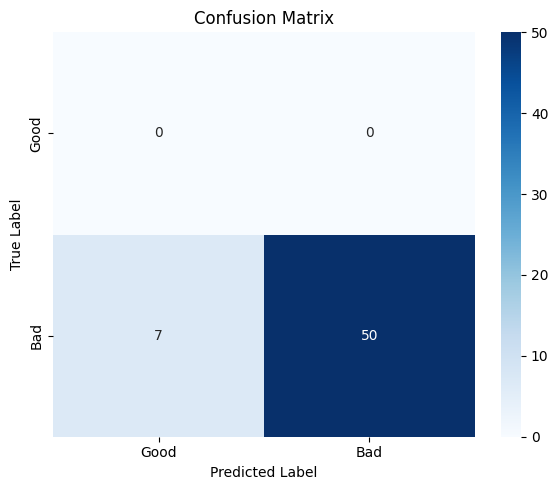

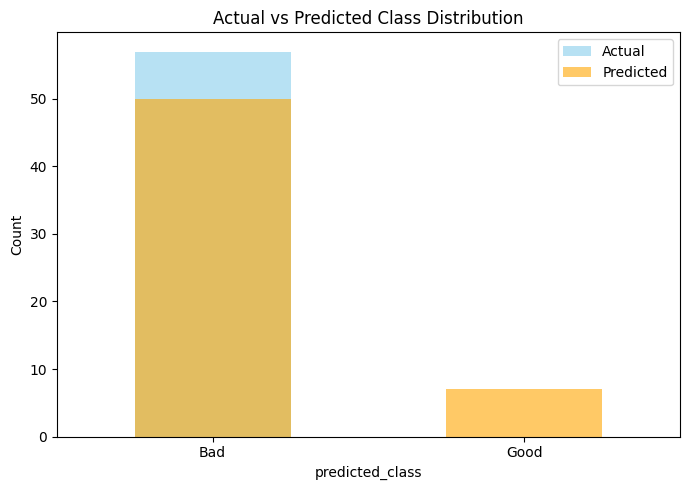

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# 🔄 1) CSV paths
gt_path   = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/GT.csv"
pred_path = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/predictions_for_Bad.csv"

# 📖 2) Read CSVs
gt_df   = pd.read_csv(gt_path)        # pair_key, Ground_truth
pred_df = pd.read_csv(pred_path)      # pair_key, pred_class, confidence

# 🧹 3) Rename columns to unify
gt_df   = gt_df.rename(columns={"Ground_truth": "true_class"})
pred_df = pred_df.rename(columns={"pred_class": "predicted_class"})

# 🔗 4) Merge on pair_key
df = pd.merge(gt_df, pred_df, on="pair_key", how="inner", validate="one_to_one")

if df.empty:
    raise ValueError("❌ No matching pair_key values between the two CSV files!")

print(f"✅ Evaluating {len(df)} matching samples")

# 🔁 5) Map class names to 0/1
label_map = {"Good": 0, "Bad": 1, "bad": 1} # Added 'bad' mapping
inv_label_map = {0: "Good", 1: "Bad"}

y_true = df["true_class"].map(label_map).values
y_pred = df["predicted_class"].map(label_map).values

# 📊 6) Metrics
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=["Good", "Bad"], digits=4))
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# 📉 7) Confusion Matrix Plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Good", "Bad"],
            yticklabels=["Good", "Bad"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 📊 8) Bar Plot: Actual vs Predicted counts
plt.figure(figsize=(7, 5))
df["true_class"].value_counts().sort_index().plot(kind="bar", alpha=0.6, label="Actual", color="skyblue")
df["predicted_class"].value_counts().sort_index().plot(kind="bar", alpha=0.6, label="Predicted", color="orange")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Actual vs Predicted Class Distribution")
plt.legend()
plt.tight_layout()
plt.show()

#2nd Validation Test

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

# Define the correct base input and output paths
base_input_dir = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result"
base_output_dir = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/spectrograms2"

labels = ["impact2", "vibration2"]  # use lowercase as per your actual folder names

# Spectrogram creation function
def create_spectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(3, 3), dpi=128)
    librosa.display.specshow(S_dB, sr=sr, cmap='viridis')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Loop through each class folder
for label in labels:
    input_dir = os.path.join(base_input_dir, label)
    output_dir = os.path.join(base_output_dir, label)
    os.makedirs(output_dir, exist_ok=True)

    for file in tqdm(os.listdir(input_dir), desc=f"Processing {label}"):
        if file.endswith(".wav"):
            input_path = os.path.join(input_dir, file)
            output_path = os.path.join(output_dir, file.replace(".wav", ".png"))
            create_spectrogram(input_path, output_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing vibration2: 100%|██████████| 83/83 [00:26<00:00,  3.09it/s]


✅ Found 83 matching pairs.


Preparing image pairs: 100%|██████████| 83/83 [00:01<00:00, 52.41it/s]


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 663ms/step
📁 Results saved to /content/drive/MyDrive/Hammering_Test/s01/Bad_result/predictions2_for_Bad.csv

--- Prediction Results ---
sample_100_0: Bad (conf: 0.9999)
sample_100_1: Bad (conf: 1.0000)
sample_100_2: Bad (conf: 1.0000)
sample_100_3: Bad (conf: 1.0000)
sample_100_4: Bad (conf: 1.0000)
sample_100_5: Bad (conf: 1.0000)
sample_101_0: Bad (conf: 1.0000)
sample_101_1: Bad (conf: 1.0000)
sample_101_2: Bad (conf: 1.0000)
sample_101_3: Bad (conf: 1.0000)
sample_101_4: Bad (conf: 1.0000)
sample_102_0: Bad (conf: 1.0000)
sample_102_1: Bad (conf: 1.0000)
sample_102_2: Bad (conf: 1.0000)
sample_102_3: Bad (conf: 1.0000)
sample_103_0: Bad (conf: 1.0000)
sample_103_1: Bad (conf: 1.0000)
sample_103_2: Bad (conf: 1.0000)
sample_103_3: Bad (conf: 1.0000)
sample_103_4: Bad (conf: 1.0000)
sample_104_0: Bad (conf: 1.0000)
sample_104_1: Bad (conf: 1.0000)
sample_104_2: Bad (conf: 1.0000)
sample_104_3: Bad (conf: 1.0000)
sample_104_4: Bad (conf: 1.0000)
sample_104_

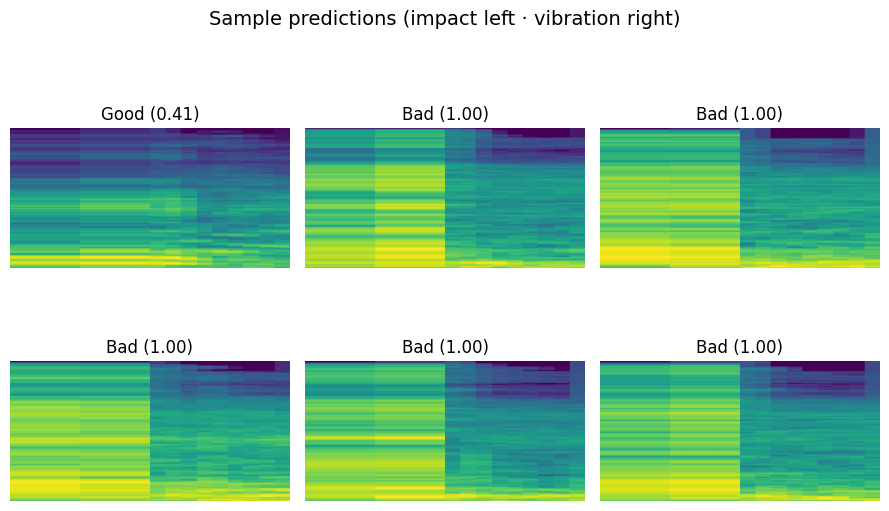

In [ ]:
import os, re, csv, random, numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# 1️⃣  Load your trained model
model = load_model("/content/drive/MyDrive/Hammering_Test/dual_input_brick_classifier.h5")

# 2️⃣  Paths to the spectrogram folders in Drive
impact_dir    = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/spectrograms2/impact2"
vibration_dir = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/spectrograms2/vibration2"

IMG_SIZE   = (128, 128)          # must match model’s expected size
label_map  = {0: "Good", 1: "Bad"}
csv_path   = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/predictions2_for_Bad.csv"

# ↪️ helper: read + scale an image
def load_and_preprocess(path):
    img = load_img(path, target_size=IMG_SIZE)
    return img_to_array(img) / 255.0

# ↪️ helper: turn filename into “pair key”
#   "sample_1_hit_0.png" ─▶ "sample_1_0"
#   "sample_1_vib_0.png" ─▶ "sample_1_0"
def pair_key(fname: str) -> str:
    base = os.path.splitext(fname.lower())[0]            # sample_1_hit_0
    base = re.sub(r'_(hit|vib)', '_', base)              # sample_1__0  → sample_1_0
    base = re.sub(r'__', '_', base)                      # remove double underscore if created
    return base

# 3️⃣  Index all impact & vibration files by their pair key
impact_dict, vibration_dict = {}, {}
for f in os.listdir(impact_dir):
    if f.endswith(".png"): impact_dict[pair_key(f)] = f
for f in os.listdir(vibration_dir):
    if f.endswith(".png"): vibration_dict[pair_key(f)] = f


matched_keys = sorted(set(impact_dict) & set(vibration_dict))
print(f"✅ Found {len(matched_keys)} matching pairs.")
if not matched_keys:
    raise ValueError("No matching pairs found — check the filename pattern.")

# 4️⃣  Load, pair, and predict
impact_imgs, vibration_imgs, names = [], [], []
for key in tqdm(matched_keys, desc="Preparing image pairs"):
    impact_imgs.append(load_and_preprocess(os.path.join(impact_dir,    impact_dict[key])))
    vibration_imgs.append(load_and_preprocess(os.path.join(vibration_dir, vibration_dict[key])))
    names.append(key)                 # use key or original filename

impact_imgs, vibration_imgs = map(np.array, (impact_imgs, vibration_imgs))

preds   = model.predict([impact_imgs, vibration_imgs]).flatten()
labels  = (preds > 0.5).astype(int)

# 5️⃣ Save to CSV (pred_class: "Good" or "Bad")
with open(csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["pair_key", "pred_class", "confidence"])  # <-- updated column names
    for fname, lab, prob in zip(names, labels, preds):
        writer.writerow([fname, label_map[lab], f"{prob:.4f}"])  # <-- convert label to "Good"/"Bad"
print(f"📁 Results saved to {csv_path}")


# 6️⃣  Console summary
print("\n--- Prediction Results ---")
for fname, lab, prob in zip(names, labels, preds):
    print(f"{fname}: {label_map[lab]} (conf: {prob:.4f})")

# 7️⃣  Visualise a few random examples (3×2 grid)
n_show = min(6, len(names))               # don’t exceed dataset size
idxs   = random.sample(range(len(names)), n_show)
plt.figure(figsize=(9, 6))
for i, idx in enumerate(idxs, 1):
    plt.subplot(2, 3, i)
    # stack the impact + vibration images side‑by‑side for quick inspection
    combo = np.hstack([
        impact_imgs[idx],
        vibration_imgs[idx]
    ])
    plt.imshow(combo)
    title = f"{label_map[labels[idx]]} ({preds[idx]:.2f})"
    plt.title(title)
    plt.axis("off")
plt.suptitle("Sample predictions (impact left · vibration right)", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Hammering_Test/s01/Bad_result/predictions2_for_Bad.csv")

In [ ]:
df['Ground_truth'] = 'bad'

In [ ]:
df.drop(['pred_class','confidence'], axis=1, inplace=True)

In [ ]:
df.to_csv("/content/drive/MyDrive/Hammering_Test/s01/Bad_result/GT2.csv", index=False)

✅ Evaluating 83 matching samples

--- Classification Report ---
              precision    recall  f1-score   support

        Good     0.0000    0.0000    0.0000         0
         Bad     1.0000    0.9518    0.9753        83

    accuracy                         0.9518        83
   macro avg     0.5000    0.4759    0.4877        83
weighted avg     1.0000    0.9518    0.9753        83

✅ Accuracy: 0.9518


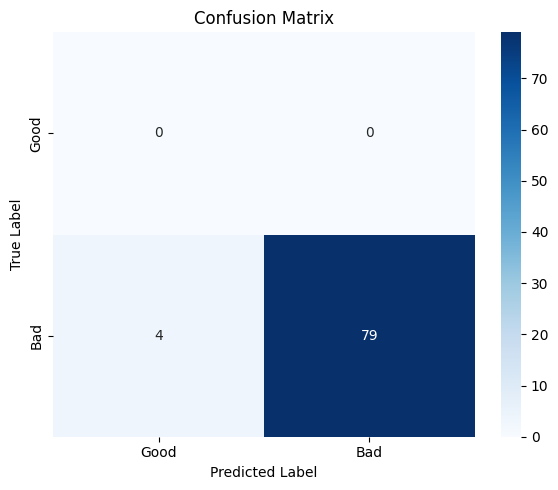

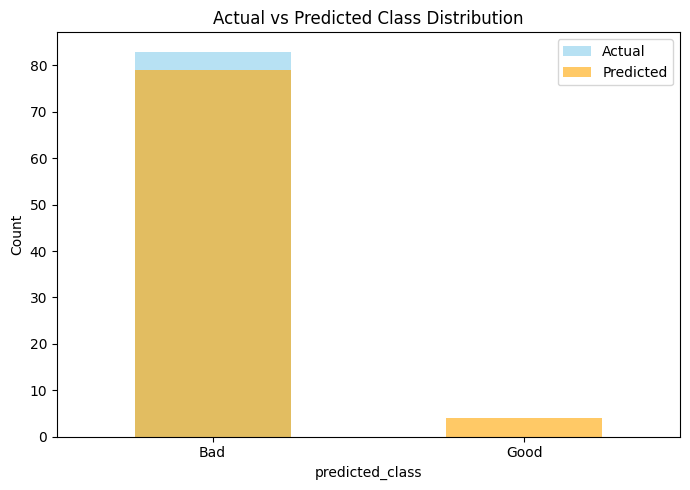

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# 🔄 1) CSV paths
gt_path   = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/GT2.csv"
pred_path = "/content/drive/MyDrive/Hammering_Test/s01/Bad_result/predictions2_for_Bad.csv"

# 📖 2) Read CSVs
gt_df   = pd.read_csv(gt_path)        # pair_key, Ground_truth
pred_df = pd.read_csv(pred_path)      # pair_key, pred_class, confidence

# 🧹 3) Rename columns to unify
gt_df   = gt_df.rename(columns={"Ground_truth": "true_class"})
pred_df = pred_df.rename(columns={"pred_class": "predicted_class"})

# 🔗 4) Merge on pair_key
df = pd.merge(gt_df, pred_df, on="pair_key", how="inner", validate="one_to_one")

if df.empty:
    raise ValueError("❌ No matching pair_key values between the two CSV files!")

print(f"✅ Evaluating {len(df)} matching samples")

# 🔁 5) Map class names to 0/1
label_map = {"Good": 0, "Bad": 1, "bad": 1} # Added 'bad' mapping
inv_label_map = {0: "Good", 1: "Bad"}

y_true = df["true_class"].map(label_map).values
y_pred = df["predicted_class"].map(label_map).values

# 📊 6) Metrics
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=["Good", "Bad"], digits=4))
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# 📉 7) Confusion Matrix Plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Good", "Bad"],
            yticklabels=["Good", "Bad"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 📊 8) Bar Plot: Actual vs Predicted counts
plt.figure(figsize=(7, 5))
df["true_class"].value_counts().sort_index().plot(kind="bar", alpha=0.6, label="Actual", color="skyblue")
df["predicted_class"].value_counts().sort_index().plot(kind="bar", alpha=0.6, label="Predicted", color="orange")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Actual vs Predicted Class Distribution")
plt.legend()
plt.tight_layout()
plt.show()

# Final Bad validation Dataset Balambu

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

# Define the correct base input and output paths
base_input_dir = "/content/drive/MyDrive/Hammering_Test/New_val_B/segmented_audio"
base_output_dir = "/content/drive/MyDrive/Hammering_Test/New_val_B/spectrograms"

labels = ["impact", "vibration"]  # use lowercase as per your actual folder names

# Spectrogram creation function
def create_spectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(3, 3), dpi=128)
    librosa.display.specshow(S_dB, sr=sr, cmap='viridis')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Loop through each class folder
for label in labels:
    input_dir = os.path.join(base_input_dir, label)
    output_dir = os.path.join(base_output_dir, label)
    os.makedirs(output_dir, exist_ok=True)

    for file in tqdm(os.listdir(input_dir), desc=f"Processing {label}"):
        if file.endswith(".wav"):
            input_path = os.path.join(input_dir, file)
            output_path = os.path.join(output_dir, file.replace(".wav", ".png"))
            create_spectrogram(input_path, output_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing impact:   0%|          | 0/310 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=882
  warnings.warn(
Processing vibration: 100%|██████████| 310/310 [00:52<00:00,  5.89it/s]


✅ Found 310 matching pairs.


Preparing image pairs: 100%|██████████| 310/310 [00:05<00:00, 54.72it/s]


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 503ms/step
📁 Results saved to /content/drive/MyDrive/Hammering_Test/New_val_B/predictions_for_Bad.csv

--- Prediction Results ---
sam10_1: Bad (conf: 1.0000)
sam10_2: Bad (conf: 1.0000)
sam10_3: Bad (conf: 1.0000)
sam10_4: Bad (conf: 1.0000)
sam10_5: Bad (conf: 1.0000)
sam11_1: Bad (conf: 0.5938)
sam11_2: Bad (conf: 0.9954)
sam11_3: Bad (conf: 1.0000)
sam12_1: Bad (conf: 0.9985)
sam12_2: Good (conf: 0.4321)
sam12_3: Bad (conf: 0.9998)
sam12_4: Bad (conf: 0.8215)
sam12_5: Bad (conf: 1.0000)
sam13_1: Bad (conf: 1.0000)
sam13_2: Bad (conf: 0.9996)
sam13_3: Bad (conf: 1.0000)
sam13_4: Bad (conf: 0.9999)
sam13_5: Bad (conf: 1.0000)
sam14_1: Bad (conf: 1.0000)
sam14_2: Bad (conf: 1.0000)
sam14_3: Bad (conf: 1.0000)
sam14_4: Bad (conf: 1.0000)
sam15_1: Bad (conf: 1.0000)
sam15_2: Bad (conf: 1.0000)
sam15_3: Bad (conf: 1.0000)
sam15_4: Bad (conf: 1.0000)
sam16_1: Bad (conf: 1.0000)
sam16_2: Bad (conf: 1.0000)
sam16_3: Bad (conf: 1.0000)
sam16_4: Bad (conf: 1.0000)

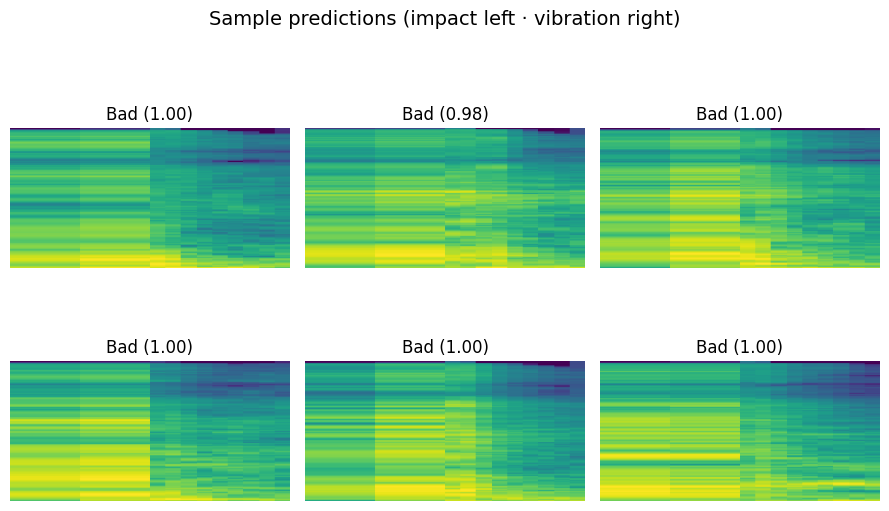

In [ ]:
import os, re, csv, random, numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# 1️⃣  Load your trained model
model = load_model("/content/drive/MyDrive/Hammering_Test/dual_input_brick_classifier.h5")

# 2️⃣  Paths to the spectrogram folders in Drive
impact_dir    = "/content/drive/MyDrive/Hammering_Test/New_val_B/spectrograms/impact"
vibration_dir = "/content/drive/MyDrive/Hammering_Test/New_val_B/spectrograms/vibration"

IMG_SIZE   = (128, 128)          # must match model’s expected size
label_map  = {0: "Good", 1: "Bad"}
csv_path   = "/content/drive/MyDrive/Hammering_Test/New_val_B/predictions_for_Bad.csv"

# ↪️ helper: read + scale an image
def load_and_preprocess(path):
    img = load_img(path, target_size=IMG_SIZE)
    return img_to_array(img) / 255.0

# ↪️ helper: turn filename into “pair key”  → sam1_imp1.png → sam1_1
def pair_key(fname: str) -> str:
    base = os.path.splitext(fname.lower())[0]               # sam1_imp1
    base = re.sub(r'_(imp|vib)', '_', base)                 # sam1_1
    return base

# 3️⃣  Index all impact & vibration files by their pair key
impact_dict, vibration_dict = {}, {}
for f in os.listdir(impact_dir):
    if f.endswith(".png"): impact_dict[pair_key(f)] = f
for f in os.listdir(vibration_dir):
    if f.endswith(".png"): vibration_dict[pair_key(f)] = f

matched_keys = sorted(set(impact_dict) & set(vibration_dict))
print(f"✅ Found {len(matched_keys)} matching pairs.")
if not matched_keys:
    raise ValueError("No matching pairs found — check the filename pattern.")

# 4️⃣  Load, pair, and predict
impact_imgs, vibration_imgs, names = [], [], []
for key in tqdm(matched_keys, desc="Preparing image pairs"):
    impact_imgs.append(load_and_preprocess(os.path.join(impact_dir,    impact_dict[key])))
    vibration_imgs.append(load_and_preprocess(os.path.join(vibration_dir, vibration_dict[key])))
    names.append(key)                 # use key or original filename

impact_imgs, vibration_imgs = map(np.array, (impact_imgs, vibration_imgs))

preds   = model.predict([impact_imgs, vibration_imgs]).flatten()
labels  = (preds > 0.5).astype(int)

# 5️⃣ Save to CSV (pred_class: "Good" or "Bad")
with open(csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["pair_key", "pred_class", "confidence"])  # <-- updated column names
    for fname, lab, prob in zip(names, labels, preds):
        writer.writerow([fname, label_map[lab], f"{prob:.4f}"])  # <-- convert label to "Good"/"Bad"
print(f"📁 Results saved to {csv_path}")


# 6️⃣  Console summary
print("\n--- Prediction Results ---")
for fname, lab, prob in zip(names, labels, preds):
    print(f"{fname}: {label_map[lab]} (conf: {prob:.4f})")

# 7️⃣  Visualise a few random examples (3×2 grid)
n_show = min(6, len(names))               # don’t exceed dataset size
idxs   = random.sample(range(len(names)), n_show)
plt.figure(figsize=(9, 6))
for i, idx in enumerate(idxs, 1):
    plt.subplot(2, 3, i)
    # stack the impact + vibration images side‑by‑side for quick inspection
    combo = np.hstack([
        impact_imgs[idx],
        vibration_imgs[idx]
    ])
    plt.imshow(combo)
    title = f"{label_map[labels[idx]]} ({preds[idx]:.2f})"
    plt.title(title)
    plt.axis("off")
plt.suptitle("Sample predictions (impact left · vibration right)", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

In [ ]:
dfB = pd.read_csv("/content/drive/MyDrive/Hammering_Test/New_val_B/predictions_for_Bad.csv")

In [ ]:
dfB['Ground_truth'] = 'Bad'

In [ ]:
dfB.to_csv("/content/drive/MyDrive/Hammering_Test/New_val_B/predictions_B_GT.csv", index=False)

In [ ]:
dfB

,pair_key,pred_class,confidence,Ground_truth
0,sam10_1,Bad,1.0000,Bad
1,sam10_2,Bad,1.0000,Bad
2,sam10_3,Bad,1.0000,Bad
3,sam10_4,Bad,1.0000,Bad
4,sam10_5,Bad,1.0000,Bad
...,...,...,...,...
305,sam9_1,Bad,0.9999,Bad
306,sam9_2,Bad,1.0000,Bad
307,sam9_3,Good,0.0249,Bad
308,sam9_4,Bad,1.0000,Bad


In [ ]:
dfB.head(10)

,pair_key,pred_class,confidence
0,sam10_1,Bad,1.0000
1,sam10_2,Bad,1.0000
2,sam10_3,Bad,1.0000
3,sam10_4,Bad,1.0000
4,sam10_5,Bad,1.0000
5,sam11_1,Bad,0.5938
6,sam11_2,Bad,0.9954
7,sam11_3,Bad,1.0000
8,sam12_1,Bad,0.9985
9,sam12_2,Good,0.4321


In [ ]:
df['Ground_truth'] = 'bad'

In [ ]:
df2= pd.read_csv("/content/drive/MyDrive/Hammering_Test/New_val_G/predictions_GT.csv")

In [ ]:
df2.head(5)

,pair_key,Ground_truth
0,sam10_1,Good
1,sam10_2,Good
2,sam10_3,Good
3,sam10_4,Good
4,sam10_5,Good


In [ ]:
combined_df = pd.concat([df, df2])
display(combined_df)

,pair_key,pred_class,confidence,Ground_truth,y_true,y_pred
0,sam10_1,bad,1.0,bad,1.0,1.0
1,sam10_2,bad,1.0,bad,1.0,1.0
2,sam10_3,bad,1.0,bad,1.0,1.0
3,sam10_4,bad,1.0,bad,1.0,1.0
4,sam10_5,bad,1.0,bad,1.0,1.0
...,...,...,...,...,...,...
328,sam9_1,NaN,NaN,Good,NaN,NaN
329,sam9_2,NaN,NaN,Good,NaN,NaN
330,sam9_3,NaN,NaN,Good,NaN,NaN
331,sam9_4,NaN,NaN,Good,NaN,NaN


In [ ]:
combined_df.to_csv("/content/drive/MyDrive/Hammering_Test/Prediction_GB_GT.csv", index=False)

In [ ]:
combined_df = pd.concat([dfB, dfG])
display(combined_df)

,pair_key,pred_class,confidence,Ground_truth
0,sam10_1,Bad,1.0000,Bad
1,sam10_2,Bad,1.0000,Bad
2,sam10_3,Bad,1.0000,Bad
3,sam10_4,Bad,1.0000,Bad
4,sam10_5,Bad,1.0000,Bad
...,...,...,...,...
328,sam9_1,Good,0.0017,Good
329,sam9_2,Good,0.0266,Good
330,sam9_3,Good,0.0062,Good
331,sam9_4,Good,0.0000,Good


✅ Evaluating 643 matching samples

🔍 Classification Report:

              precision    recall  f1-score   support

        Good       0.94      0.91      0.92       333
         Bad       0.91      0.94      0.92       310

    accuracy                           0.92       643
   macro avg       0.92      0.92      0.92       643
weighted avg       0.92      0.92      0.92       643



<Figure size 600x600 with 0 Axes>

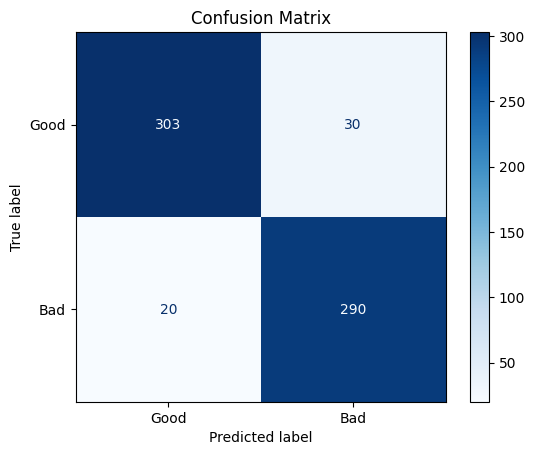

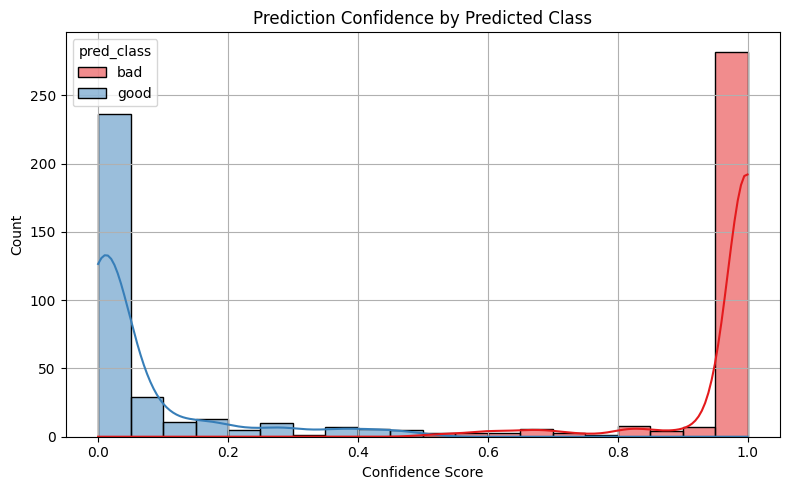

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Load prediction CSV
csv_path = "/content/drive/MyDrive/Hammering_Test/Prediction_GB_GT.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # Remove whitespace from headers

# 2️⃣ Normalize text labels
df['pred_class'] = df['pred_class'].str.strip().str.lower()
df['Ground_truth'] = df['Ground_truth'].str.strip().str.lower()

# 3️⃣ Encode labels: Good = 0, Bad = 1
label_map = {"bad": 1, "good": 0}
df['y_true'] = df['Ground_truth'].map(label_map)
df['y_pred'] = df['pred_class'].map(label_map)

print(f"✅ Evaluating {len(df)} matching samples")

# 4️⃣ Print metrics
print("\n🔍 Classification Report:\n")
print(classification_report(df['y_true'], df['y_pred'], target_names=["Good", "Bad"]))


# 5️⃣ Confusion Matrix
cm = confusion_matrix(df['y_true'], df['y_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good", "Bad"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 6️⃣ Confidence Score Distribution by Predicted Class
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='confidence', hue='pred_class', bins=20, kde=True, palette='Set1')
plt.title("Prediction Confidence by Predicted Class")
plt.xlabel("Confidence Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
dfG = pd.read_csv("/content/drive/MyDrive/Hammering_Test/New_val_G/predictions.csv")

In [ ]:
dfG

,pair_key,pred_class,confidence
0,sam10_1,Good,0.0201
1,sam10_2,Good,0.0188
2,sam10_3,Good,0.0032
3,sam10_4,Good,0.0040
4,sam10_5,Good,0.0459
...,...,...,...
328,sam9_1,Good,0.0017
329,sam9_2,Good,0.0266
330,sam9_3,Good,0.0062
331,sam9_4,Good,0.0000


In [ ]:
dfG['Ground_truth'] = 'Good'

In [ ]:
dfG.to_csv("/content/drive/MyDrive/Hammering_Test/New_val_G/predicition_G_GT.csv", index=False)

In [ ]:
dfG

,pair_key,pred_class,confidence,Ground_truth
0,sam10_1,Good,0.0201,Good
1,sam10_2,Good,0.0188,Good
2,sam10_3,Good,0.0032,Good
3,sam10_4,Good,0.0040,Good
4,sam10_5,Good,0.0459,Good
...,...,...,...,...
328,sam9_1,Good,0.0017,Good
329,sam9_2,Good,0.0266,Good
330,sam9_3,Good,0.0062,Good
331,sam9_4,Good,0.0000,Good


✅ Evaluating 602 matching samples

🔍 Classification Report:

              precision    recall  f1-score   support

        Good       0.95      0.96      0.95       297
         Bad       0.96      0.95      0.96       305

    accuracy                           0.96       602
   macro avg       0.96      0.96      0.96       602
weighted avg       0.96      0.96      0.96       602



<Figure size 600x600 with 0 Axes>

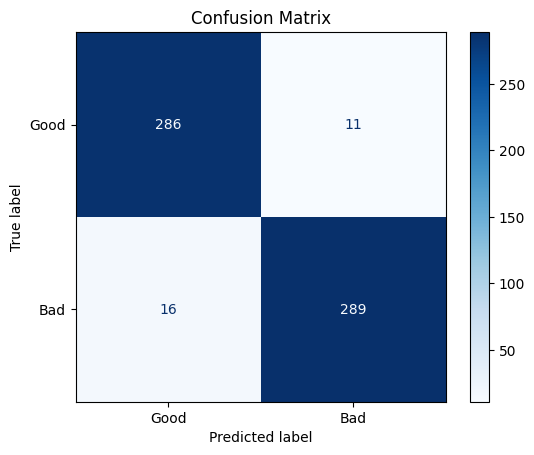

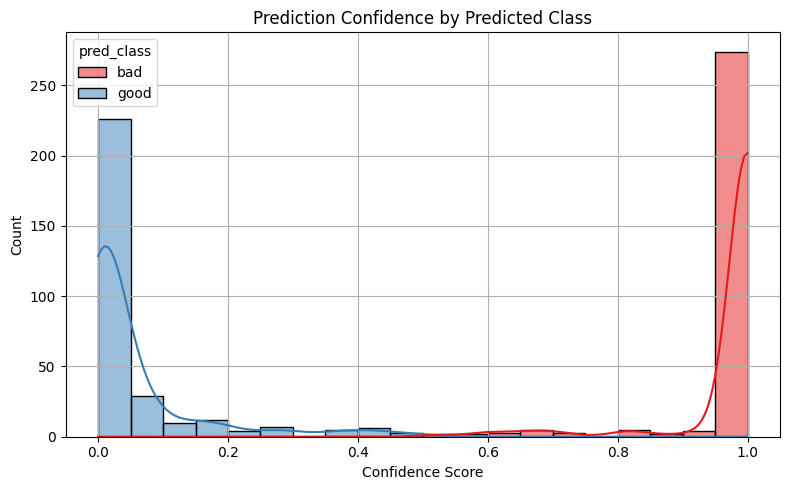

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Load prediction CSV
csv_path = "/content/Prediction_Good_Bad.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # Remove whitespace from headers

# 2️⃣ Normalize text labels
df['pred_class'] = df['pred_class'].str.strip().str.lower()
df['Ground_truth'] = df['Ground_truth'].str.strip().str.lower()

# 3️⃣ Encode labels: Good = 0, Bad = 1
label_map = {"bad": 1, "good": 0}
df['y_true'] = df['Ground_truth'].map(label_map)
df['y_pred'] = df['pred_class'].map(label_map)

print(f"✅ Evaluating {len(df)} matching samples")

# 4️⃣ Print metrics
print("\n🔍 Classification Report:\n")
print(classification_report(df['y_true'], df['y_pred'], target_names=["Good", "Bad"]))


# 5️⃣ Confusion Matrix
cm = confusion_matrix(df['y_true'], df['y_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good", "Bad"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 6️⃣ Confidence Score Distribution by Predicted Class
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='confidence', hue='pred_class', bins=20, kde=True, palette='Set1')
plt.title("Prediction Confidence by Predicted Class")
plt.xlabel("Confidence Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


# Model Validation on Good Brick Wall Sample from Tribhuwan UNI

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

# Define the correct base input and output paths
base_input_dir = "/content/drive/MyDrive/Hammering_Test/New_val_G_Wall/segmented_audio"
base_output_dir = "/content/drive/MyDrive/Hammering_Test/New_val_G_Wall/spectrograms"

labels = ["impact", "vibration"]  # use lowercase as per your actual folder names

# Spectrogram creation function
def create_spectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(3, 3), dpi=128)
    librosa.display.specshow(S_dB, sr=sr, cmap='viridis')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Loop through each class folder
for label in labels:
    input_dir = os.path.join(base_input_dir, label)
    output_dir = os.path.join(base_output_dir, label)
    os.makedirs(output_dir, exist_ok=True)

    for file in tqdm(os.listdir(input_dir), desc=f"Processing {label}"):
        if file.endswith(".wav"):
            input_path = os.path.join(input_dir, file)
            output_path = os.path.join(output_dir, file.replace(".wav", ".png"))
            create_spectrogram(input_path, output_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing vibration: 100%|██████████| 101/101 [00:10<00:00, 10.02it/s]


✅ Found 101 matching pairs.


Preparing image pairs: 100%|██████████| 101/101 [00:01<00:00, 58.66it/s]


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 662ms/step
📁 Results saved to /content/drive/MyDrive/Hammering_Test/New_val_G_Wall/predictions_for_G_Wall.csv

--- Prediction Results ---
sam10_1: Good (conf: 0.0000)
sam10_2: Good (conf: 0.0019)
sam10_3: Good (conf: 0.0030)
sam10_4: Good (conf: 0.0002)
sam10_5: Good (conf: 0.0066)
sam10_6: Good (conf: 0.1708)
sam11_1: Good (conf: 0.0003)
sam11_2: Good (conf: 0.0069)
sam11_3: Good (conf: 0.0046)
sam11_4: Good (conf: 0.0009)
sam11_5: Good (conf: 0.0215)
sam11_6: Good (conf: 0.0071)
sam12_1: Good (conf: 0.0028)
sam12_2: Good (conf: 0.0058)
sam12_3: Good (conf: 0.0004)
sam12_4: Good (conf: 0.0002)
sam12_5: Good (conf: 0.0098)
sam12_6: Good (conf: 0.0001)
sam13_1: Bad (conf: 0.5562)
sam13_10: Good (conf: 0.2784)
sam13_11: Bad (conf: 0.7207)
sam13_12: Good (conf: 0.0359)
sam13_2: Good (conf: 0.2791)
sam13_3: Bad (conf: 0.9173)
sam13_4: Good (conf: 0.0206)
sam13_5: Good (conf: 0.3745)
sam13_6: Good (conf: 0.0000)
sam13_7: Good (conf: 0.2731)
sam13_8: Bad (conf: 0.

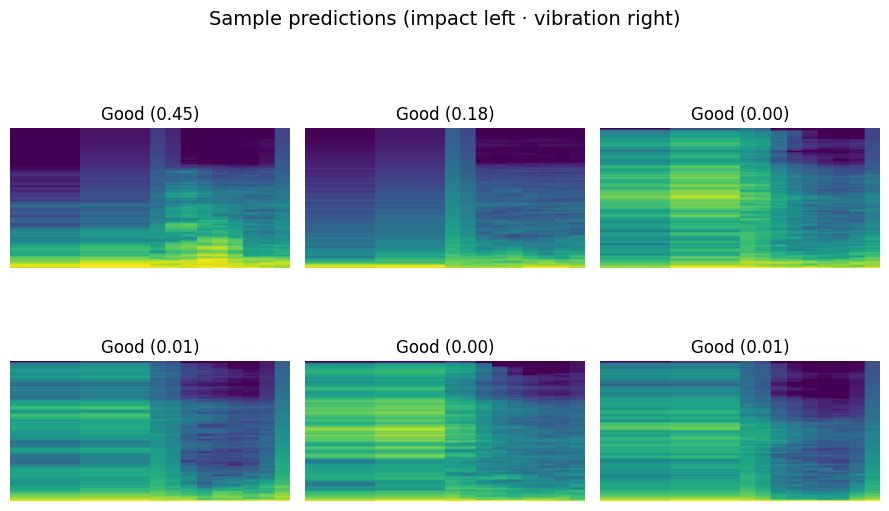

In [ ]:
import os, re, csv, random, numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# 1️⃣  Load your trained model
model = load_model("/content/drive/MyDrive/Hammering_Test/dual_input_brick_classifier.h5")

# 2️⃣  Paths to the spectrogram folders in Drive
impact_dir    = "/content/drive/MyDrive/Hammering_Test/New_val_G_Wall/spectrograms/impact"
vibration_dir = "/content/drive/MyDrive/Hammering_Test/New_val_G_Wall/spectrograms/vibration"

IMG_SIZE   = (128, 128)          # must match model’s expected size
label_map  = {0: "Good", 1: "Bad"}
csv_path   = "/content/drive/MyDrive/Hammering_Test/New_val_G_Wall/predictions_for_G_Wall.csv"

# ↪️ helper: read + scale an image
def load_and_preprocess(path):
    img = load_img(path, target_size=IMG_SIZE)
    return img_to_array(img) / 255.0

# ↪️ helper: turn filename into “pair key”  → sam1_imp1.png → sam1_1
def pair_key(fname: str) -> str:
    base = os.path.splitext(fname.lower())[0]               # sam1_imp1
    base = re.sub(r'_(imp|vib)', '_', base)                 # sam1_1
    return base

# 3️⃣  Index all impact & vibration files by their pair key
impact_dict, vibration_dict = {}, {}
for f in os.listdir(impact_dir):
    if f.endswith(".png"): impact_dict[pair_key(f)] = f
for f in os.listdir(vibration_dir):
    if f.endswith(".png"): vibration_dict[pair_key(f)] = f

matched_keys = sorted(set(impact_dict) & set(vibration_dict))
print(f"✅ Found {len(matched_keys)} matching pairs.")
if not matched_keys:
    raise ValueError("No matching pairs found — check the filename pattern.")

# 4️⃣  Load, pair, and predict
impact_imgs, vibration_imgs, names = [], [], []
for key in tqdm(matched_keys, desc="Preparing image pairs"):
    impact_imgs.append(load_and_preprocess(os.path.join(impact_dir,    impact_dict[key])))
    vibration_imgs.append(load_and_preprocess(os.path.join(vibration_dir, vibration_dict[key])))
    names.append(key)                 # use key or original filename

impact_imgs, vibration_imgs = map(np.array, (impact_imgs, vibration_imgs))

preds   = model.predict([impact_imgs, vibration_imgs]).flatten()
labels  = (preds > 0.5).astype(int)

# 5️⃣ Save to CSV (pred_class: "Good" or "Bad")
with open(csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["pair_key", "pred_class", "confidence"])  # <-- updated column names
    for fname, lab, prob in zip(names, labels, preds):
        writer.writerow([fname, label_map[lab], f"{prob:.4f}"])  # <-- convert label to "Good"/"Bad"
print(f"📁 Results saved to {csv_path}")


# 6️⃣  Console summary
print("\n--- Prediction Results ---")
for fname, lab, prob in zip(names, labels, preds):
    print(f"{fname}: {label_map[lab]} (conf: {prob:.4f})")

# 7️⃣  Visualise a few random examples (3×2 grid)
n_show = min(6, len(names))               # don’t exceed dataset size
idxs   = random.sample(range(len(names)), n_show)
plt.figure(figsize=(9, 6))
for i, idx in enumerate(idxs, 1):
    plt.subplot(2, 3, i)
    # stack the impact + vibration images side‑by‑side for quick inspection
    combo = np.hstack([
        impact_imgs[idx],
        vibration_imgs[idx]
    ])
    plt.imshow(combo)
    title = f"{label_map[labels[idx]]} ({preds[idx]:.2f})"
    plt.title(title)
    plt.axis("off")
plt.suptitle("Sample predictions (impact left · vibration right)", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

In [ ]:
df_GW = pd.read_csv("/content/drive/MyDrive/Hammering_Test/New_val_G_Wall/predictions_for_G_Wall.csv")

In [ ]:
df_GW.head(10)

,pair_key,pred_class,confidence
0,sam10_1,Good,0.0000
1,sam10_2,Good,0.0019
2,sam10_3,Good,0.0030
3,sam10_4,Good,0.0002
4,sam10_5,Good,0.0066
5,sam10_6,Good,0.1708
6,sam11_1,Good,0.0003
7,sam11_2,Good,0.0069
8,sam11_3,Good,0.0046
9,sam11_4,Good,0.0009


In [ ]:
df_GW.drop('Ground_Truth', inplace=True, axis = 1)

In [ ]:
df_GW['Ground_truth'] = "Good"

In [ ]:
df_GW.to_csv("/content/drive/MyDrive/Hammering_Test/New_val_G_Wall/predictions_G_Wall_GT.csv", index=False)

In [ ]:
df

In [ ]:
df_GW.head(10)

,pair_key,pred_class,confidence,Ground_truth
0,sam10_1,Good,0.0000,Good
1,sam10_2,Good,0.0019,Good
2,sam10_3,Good,0.0030,Good
3,sam10_4,Good,0.0002,Good
4,sam10_5,Good,0.0066,Good
5,sam10_6,Good,0.1708,Good
6,sam11_1,Good,0.0003,Good
7,sam11_2,Good,0.0069,Good
8,sam11_3,Good,0.0046,Good
9,sam11_4,Good,0.0009,Good


✅ Evaluating 101 matching samples

🔍 Classification Report:

              precision    recall  f1-score   support

        Good       1.00      0.88      0.94       101
         Bad       0.00      0.00      0.00         0

    accuracy                           0.88       101
   macro avg       0.50      0.44      0.47       101
weighted avg       1.00      0.88      0.94       101



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x600 with 0 Axes>

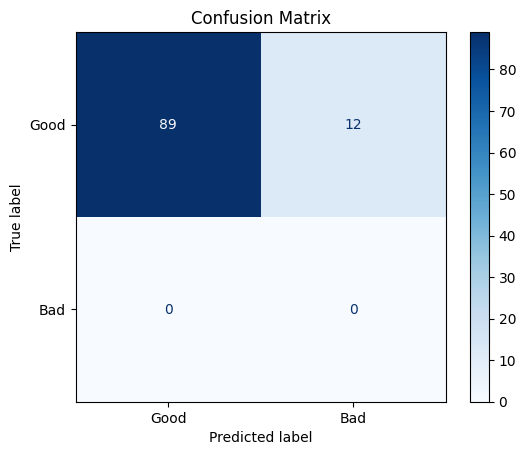

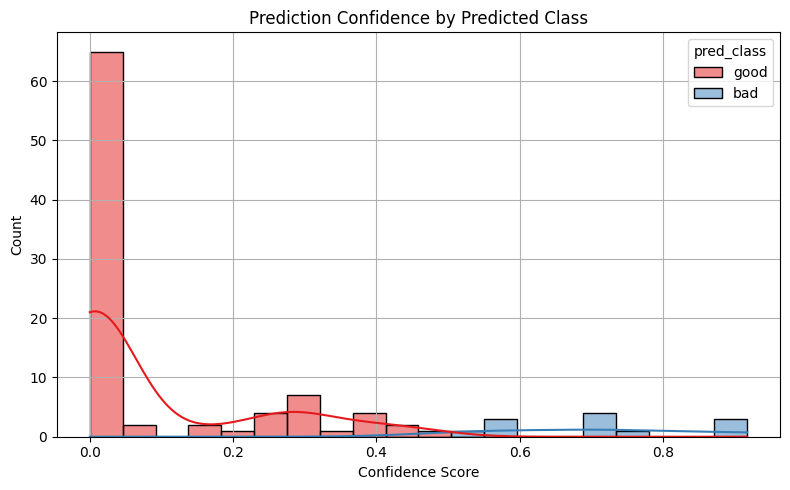

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Load prediction CSV
csv_path = "/content/drive/MyDrive/Hammering_Test/New_val_G_Wall/predictions_G_Wall_GT.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # Remove whitespace from headers

# 2️⃣ Normalize text labels
df['pred_class'] = df['pred_class'].str.strip().str.lower()
df['Ground_truth'] = df['Ground_truth'].str.strip().str.lower()

# 3️⃣ Encode labels: Good = 0, Bad = 1
label_map = {"bad": 1, "good": 0}
df['y_true'] = df['Ground_truth'].map(label_map)
df['y_pred'] = df['pred_class'].map(label_map)

print(f"✅ Evaluating {len(df)} matching samples")

# 4️⃣ Print metrics
print("\n🔍 Classification Report:\n")
print(classification_report(df['y_true'], df['y_pred'], target_names=["Good", "Bad"]))


# 5️⃣ Confusion Matrix
cm = confusion_matrix(df['y_true'], df['y_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good", "Bad"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 6️⃣ Confidence Score Distribution by Predicted Class
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='confidence', hue='pred_class', bins=20, kde=True, palette='Set1')
plt.title("Prediction Confidence by Predicted Class")
plt.xlabel("Confidence Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Evaluating 101 matching samples

🔍 Classification Report:

              precision    recall  f1-score   support

        Good       1.00      0.97      0.98       101
         Bad       0.00      0.00      0.00         0

    accuracy                           0.97       101
   macro avg       0.50      0.49      0.49       101
weighted avg       1.00      0.97      0.98       101



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x600 with 0 Axes>

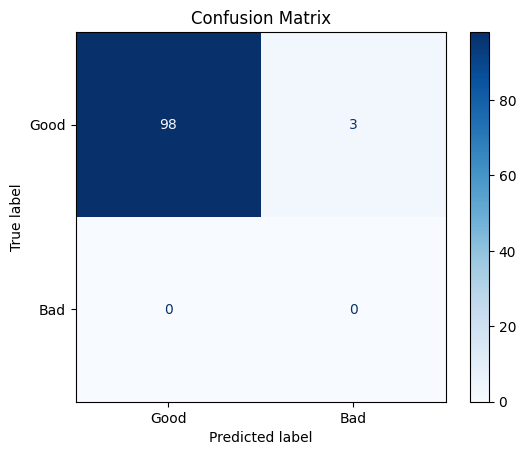

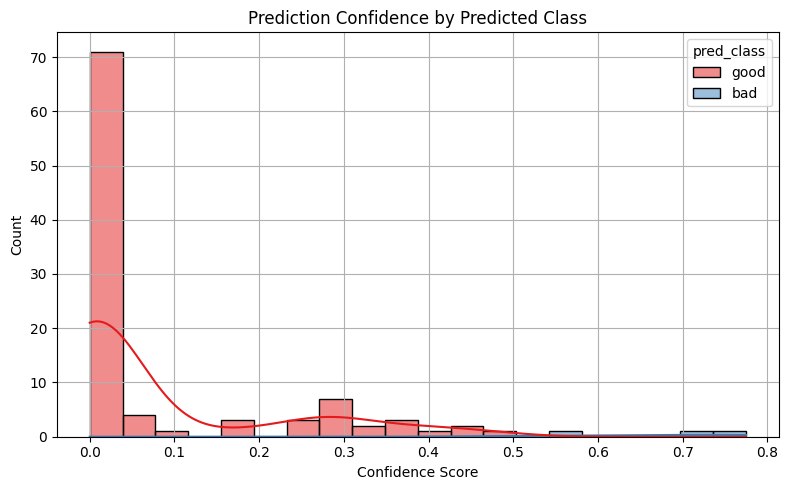

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Load prediction CSV
csv_path = "/content/predictions_G_Wall_GT.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # Remove whitespace from headers

# 2️⃣ Normalize text labels
df['pred_class'] = df['pred_class'].str.strip().str.lower()
df['Ground_truth'] = df['Ground_truth'].str.strip().str.lower()

# 3️⃣ Encode labels: Good = 0, Bad = 1
label_map = {"bad": 1, "good": 0}
df['y_true'] = df['Ground_truth'].map(label_map)
df['y_pred'] = df['pred_class'].map(label_map)

print(f"✅ Evaluating {len(df)} matching samples")

# 4️⃣ Print metrics
print("\n🔍 Classification Report:\n")
print(classification_report(df['y_true'], df['y_pred'], target_names=["Good", "Bad"]))


# 5️⃣ Confusion Matrix
cm = confusion_matrix(df['y_true'], df['y_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good", "Bad"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 6️⃣ Confidence Score Distribution by Predicted Class
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='confidence', hue='pred_class', bins=20, kde=True, palette='Set1')
plt.title("Prediction Confidence by Predicted Class")
plt.xlabel("Confidence Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Evaluating 309 matching samples

🔍 Classification Report:

              precision    recall  f1-score   support

        Good       1.00      0.96      0.98       309
         Bad       0.00      0.00      0.00         0

    accuracy                           0.96       309
   macro avg       0.50      0.48      0.49       309
weighted avg       1.00      0.96      0.98       309



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 600x600 with 0 Axes>

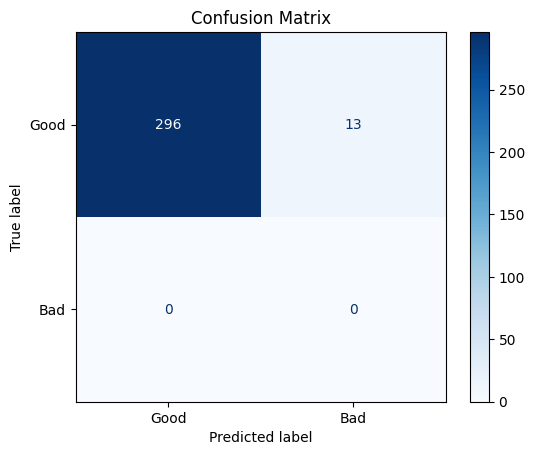

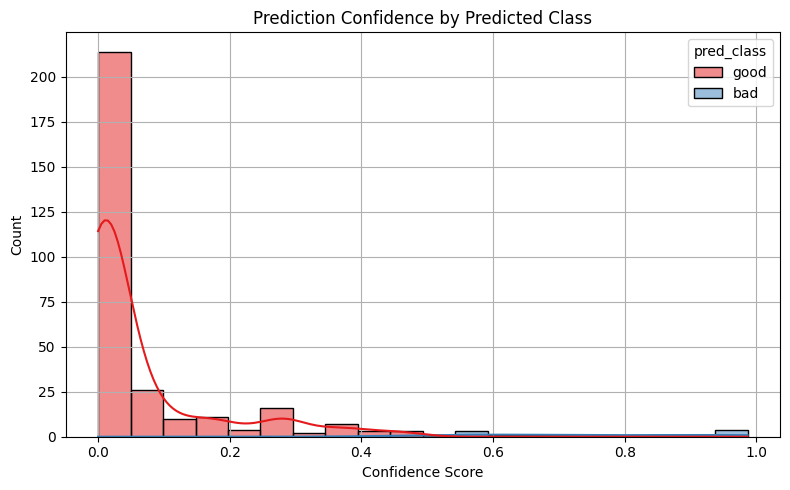

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Load prediction CSV
csv_path = "/content/predictions_G_Wall_GT_310.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # Remove whitespace from headers

# 2️⃣ Normalize text labels
df['pred_class'] = df['pred_class'].str.strip().str.lower()
df['Ground_truth'] = df['Ground_truth'].str.strip().str.lower()

# 3️⃣ Encode labels: Good = 0, Bad = 1
label_map = {"bad": 1, "good": 0}
df['y_true'] = df['Ground_truth'].map(label_map)
df['y_pred'] = df['pred_class'].map(label_map)

print(f"✅ Evaluating {len(df)} matching samples")

# 4️⃣ Print metrics
print("\n🔍 Classification Report:\n")
print(classification_report(df['y_true'], df['y_pred'], target_names=["Good", "Bad"]))


# 5️⃣ Confusion Matrix
cm = confusion_matrix(df['y_true'], df['y_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good", "Bad"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 6️⃣ Confidence Score Distribution by Predicted Class
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='confidence', hue='pred_class', bins=20, kde=True, palette='Set1')
plt.title("Prediction Confidence by Predicted Class")
plt.xlabel("Confidence Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Evaluating 614 matching samples

🔍 Classification Report:

              precision    recall  f1-score   support

        Good       0.95      0.96      0.95       309
         Bad       0.96      0.95      0.95       305

    accuracy                           0.95       614
   macro avg       0.95      0.95      0.95       614
weighted avg       0.95      0.95      0.95       614



<Figure size 600x600 with 0 Axes>

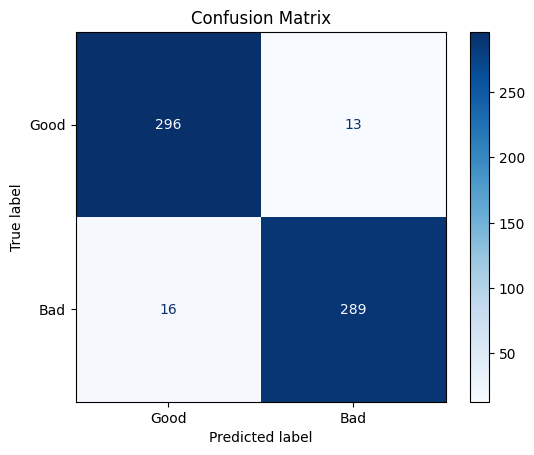

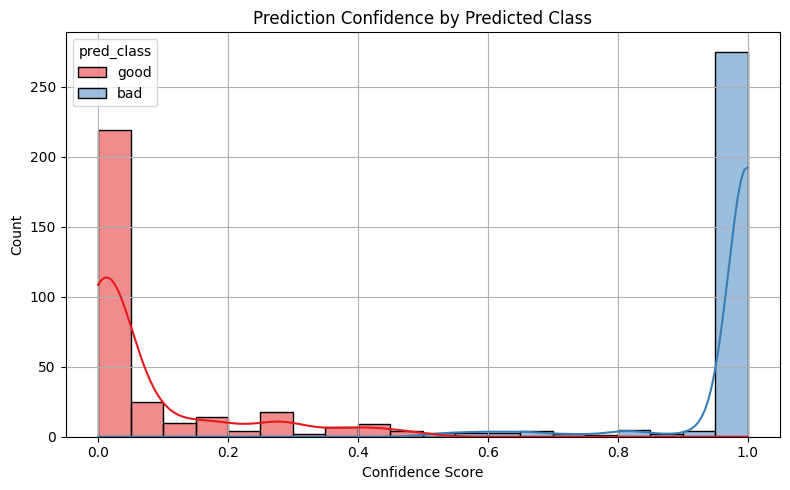

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Load prediction CSV
csv_path = "/content/predictions_G_Wall_&_Bad.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # Remove whitespace from headers

# 2️⃣ Normalize text labels
df['pred_class'] = df['pred_class'].str.strip().str.lower()
df['Ground_truth'] = df['Ground_truth'].str.strip().str.lower()

# 3️⃣ Encode labels: Good = 0, Bad = 1
label_map = {"bad": 1, "good": 0}
df['y_true'] = df['Ground_truth'].map(label_map)
df['y_pred'] = df['pred_class'].map(label_map)

print(f"✅ Evaluating {len(df)} matching samples")

# 4️⃣ Print metrics
print("\n🔍 Classification Report:\n")
print(classification_report(df['y_true'], df['y_pred'], target_names=["Good", "Bad"]))


# 5️⃣ Confusion Matrix
cm = confusion_matrix(df['y_true'], df['y_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good", "Bad"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 6️⃣ Confidence Score Distribution by Predicted Class
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='confidence', hue='pred_class', bins=20, kde=True, palette='Set1')
plt.title("Prediction Confidence by Predicted Class")
plt.xlabel("Confidence Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()
